FMA Project DM2

# Data understanding

In [2]:
#importing libraries
import pandas as pd
import os
import utils
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import itertools

In [3]:
#setting figures default size
%matplotlib inline
plt.rc('figure', figsize=(12, 8))

In [4]:
#setting pandas to display all columns
pd.set_option('display.max_columns', None)

In [5]:
print(os.getcwd())

/Users/giovanni.scognamiglio/Desktop/DM/Project2-notebooks


In [6]:
#loading all dataframes 
df = utils.load(os.path.join('fma_metadata','tracks.csv'))
genres_df = utils.load(os.path.join('fma_metadata','genres.csv'))
echonest_df = utils.load(os.path.join('fma_metadata','echonest.csv'))
features_df =  utils.load(os.path.join('fma_metadata','features.csv'))

In [7]:
#show df
df

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4      6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
...           ...                 ...           ...      ...       ...    ...   
155316          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155317          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155318          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155319          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155320          0 2017-03-26 16:22:18    2017-03-26      NaN         1  22906   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
3                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
20                <p> "spiritual songs" from Nicky Cook</p>    2710   
...                                                     ...     ...   
155316    <p>A live performance at Monty Hall on Feb 17,...    1506   
155317    <p>A live performance at Monty Hall on Feb 17,...    1506   
155318    <p>A live performance at Monty Hall on Feb 17,...    1506   
155319    <p>A live performance at Monty Hall on Feb 17,...    1506   
155320                                                  NaN    7481   

                                                                          \
             producer                                               tags   
track_id                                                                   
2                 NaN                                                 []   
3                 NaN                                                 []   
5                 NaN                                                 []   
10                NaN                                                 []   
20                NaN                                                 []   
...               ...                                                ...   
155316    Monty Hall                                                  []   
155317    Monty Hall                                                  []   
155318    Monty Hall                                                  []   
155319    Monty Hall                                                  []   
155320            NaN  [ballad, epic, rockabilly, curse, hex, hard ro...   

                                                                  \
                                  title tracks              type   
track_id                                                           
2                  AWOL - A Way Of Life      7             Album   
3                  AWOL - A Way Of Life      7             Album   
5                  AWOL - A Way Of Life      7             Album   
10                    Constant Hitmaker      2             Album   
20                                Niris     13             Album   
...                                 ...    ...               ...   
155316    Live at Monty Hall, 2/17/2017      6  Live Performance   
155317    Live at Monty Hall, 2/17/2017      6  Live Performance   
155318    Live at Monty Hall, 2/17/2017      6  Live Performance   
1

In [8]:
#show types of values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)           

In [9]:
#check for empty values (in %)
round(df.isna().sum()/len(df)*100,1)

album   comments              0.0
        date_created          3.3
        date_released        34.0
        engineer             85.6
        favorites             0.0
        id                    0.0
        information          22.0
        listens               0.0
        producer             83.1
        tags                  0.0
        title                 1.0
        tracks                0.0
        type                  6.1
artist  active_year_begin    78.7
        active_year_end      95.0
        associated_labels    86.6
        bio                  33.2
        comments              0.0
        date_created          0.8
        favorites             0.0
        id                    0.0
        latitude             58.2
        location             34.1
        longitude            58.2
        members              56.0
        name                  0.0
        related_projects     87.7
        tags                  0.0
        website              25.6
        wikipe

In [15]:
#check for empty values (in %)
(round(df.isna().sum()/len(df)*100,1)<30).sum()

32

In [957]:
df.album.engineer.notna().sum()

15295

In [952]:
df.loc[df.album.engineer.notna(),('album','engineer')] =  1

In [956]:
df.loc[df.album.engineer.notna(),('album','engineer')] 

track_id
185       1
440       1
441       1
442       1
443       1
         ..
155308    1
155309    1
155310    1
155311    1
155312    1
Name: (album, engineer), Length: 15295, dtype: object

In [959]:
df.loc[:,('album','engineer')].fillna(0, inplace= True)

In [929]:
df.loc[df.album.engineer.isna(),('album','engineer')] =  0

In [963]:
df.album.producer.value_counts()

0    88514
1    18060
Name: producer, dtype: int64

<AxesSubplot:>

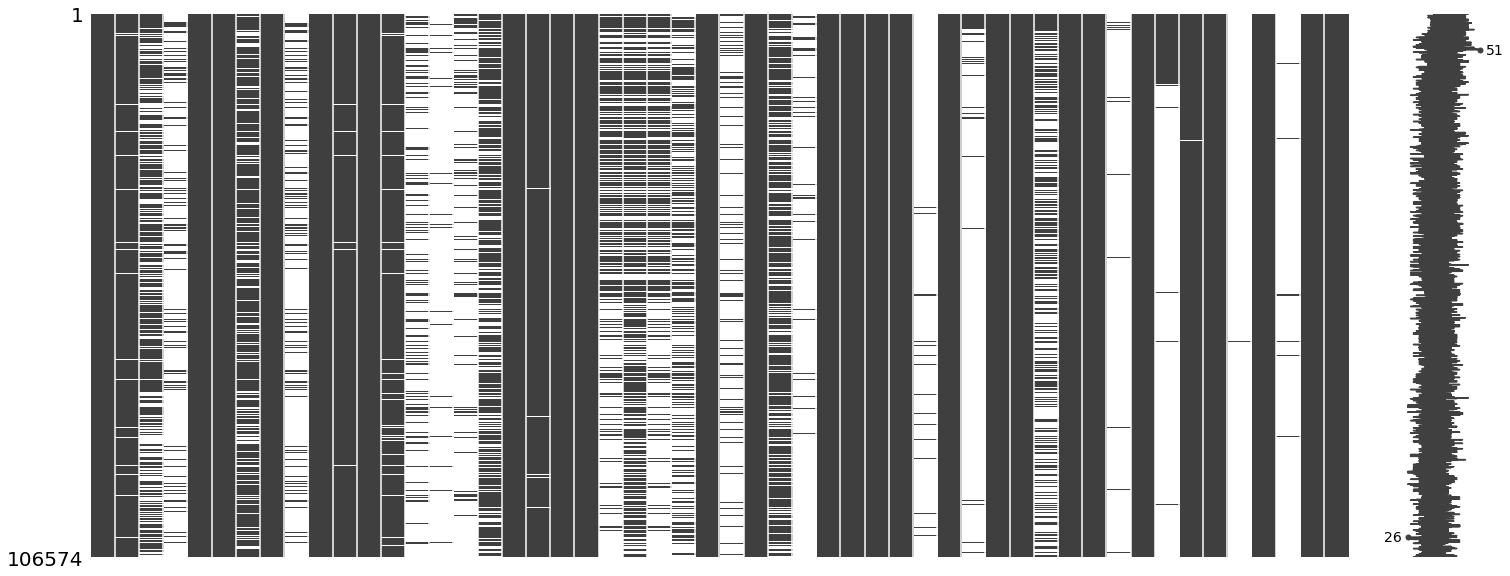

In [48]:
#visualize missing values
msno.matrix(df)

In [49]:
main_index = df.columns.levels[0].to_list()
main_index

['album', 'artist', 'set', 'track']

In [50]:
list(df)[0]

('album', 'comments')

In [51]:
df['album'].columns

Index(['comments', 'date_created', 'date_released', 'engineer', 'favorites',
       'id', 'information', 'listens', 'producer', 'tags', 'title', 'tracks',
       'type'],
      dtype='object')

In [52]:
for _ in main_index:
    print(_, len(df[_].columns.to_list()))

album 13
artist 17
set 2
track 20


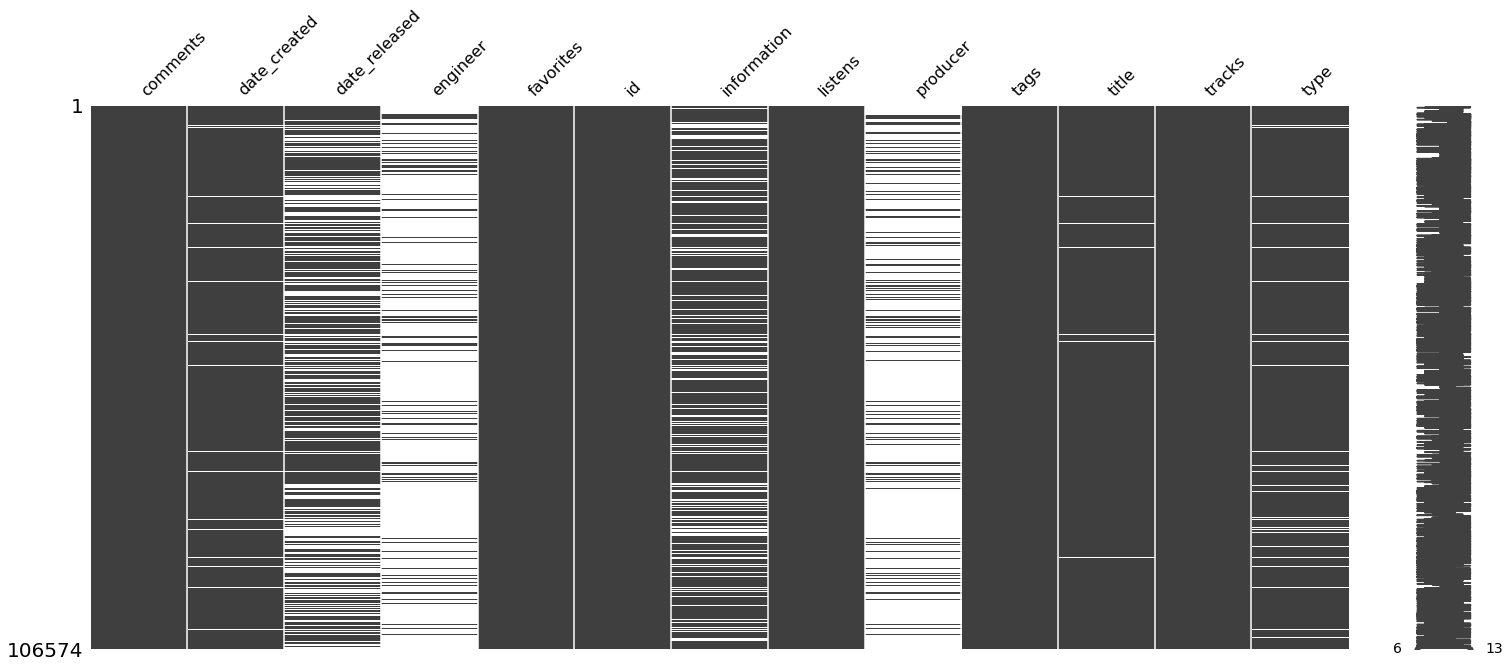

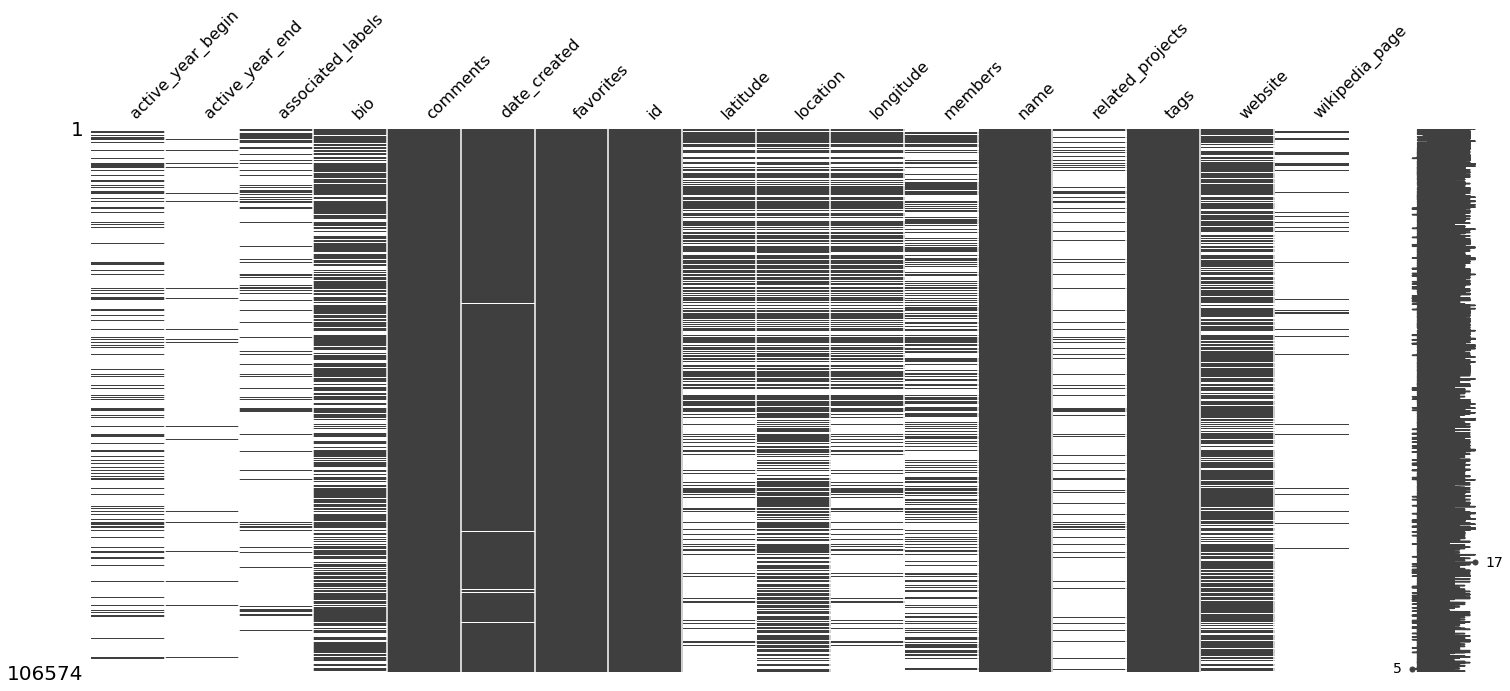

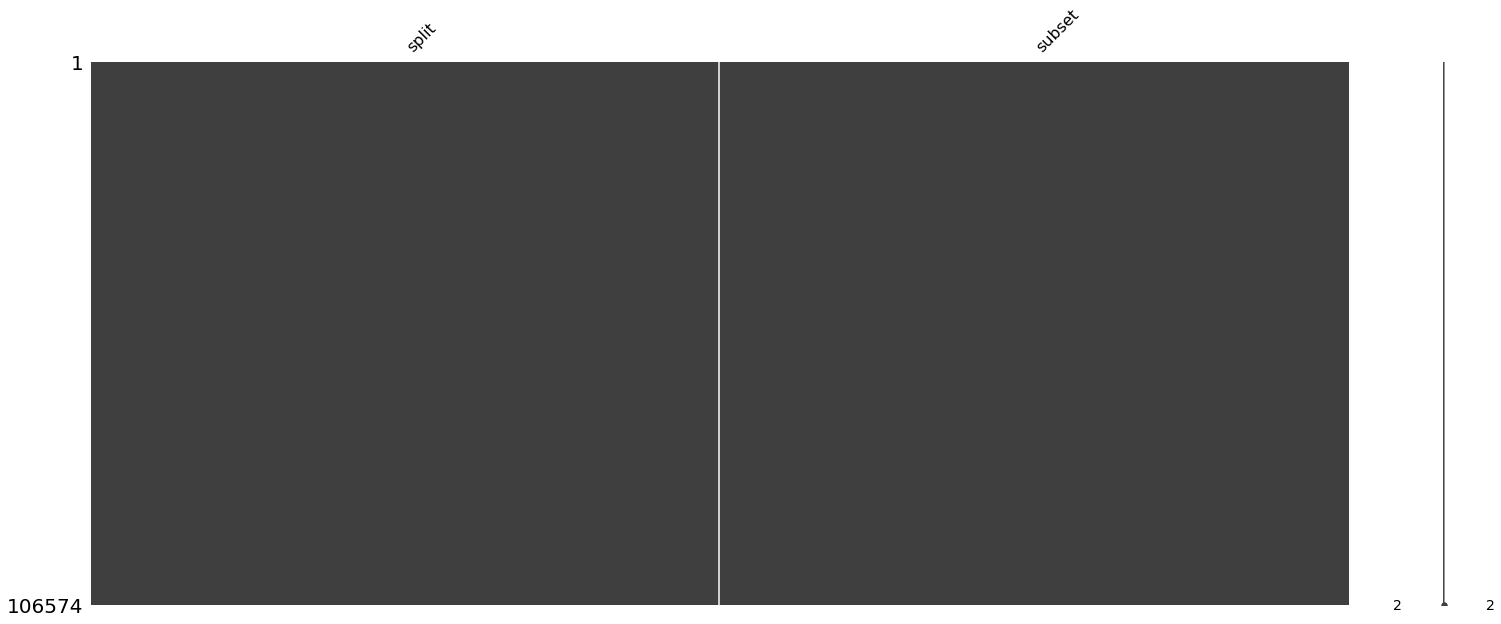

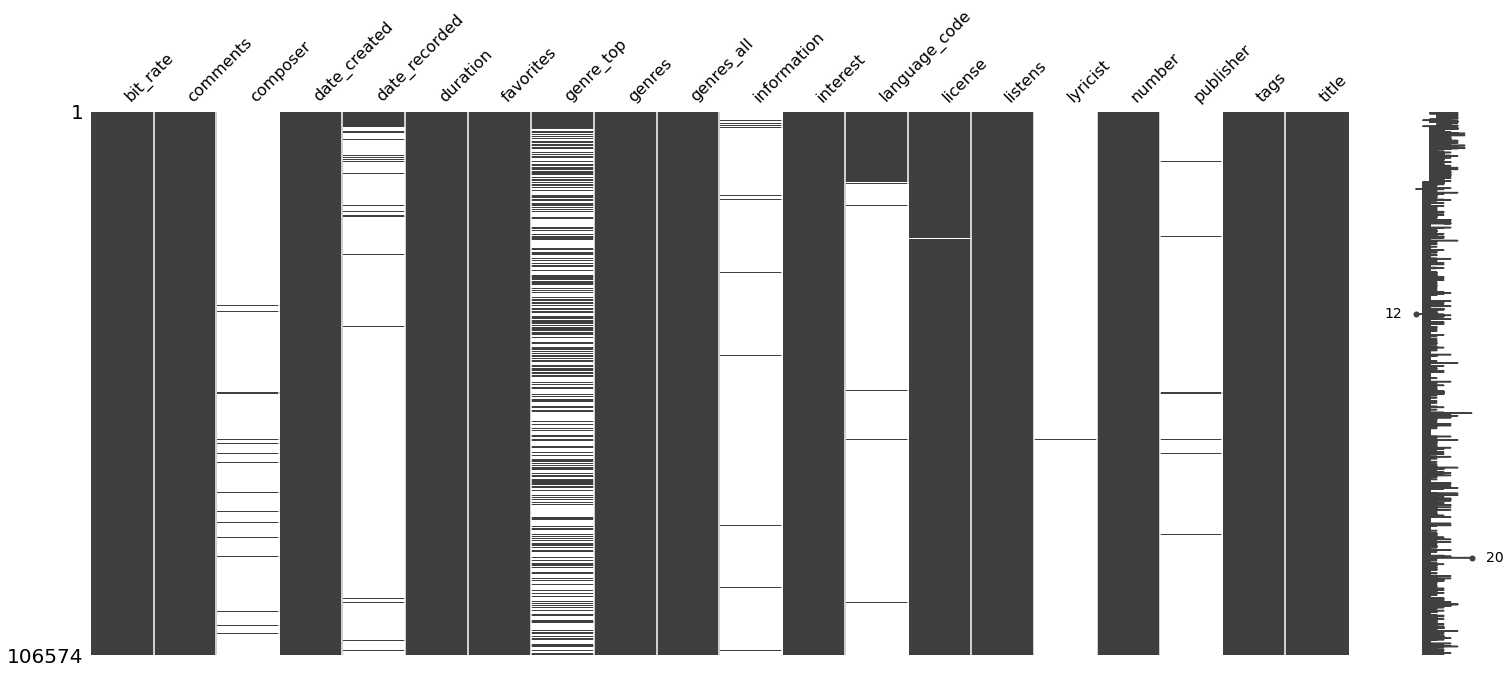

In [53]:
#visualize missing values
import missingno as msno
for _ in main_index:
    msno.matrix(df[_])

In [54]:
#show head with min number of NANs
df.dropna(thresh=len(list(df))-3).head()

album                                                             \
         comments        date_created date_released       engineer favorites   
track_id                                                                       
5155            0 2009-01-21 07:15:44    2009-01-20     Matt LeMay         4   
11915           0 2009-04-28 00:15:26    1988-01-01   Joel Simches         1   
12313           1 2009-05-05 20:37:38    2003-12-06  Emil Hagstrom         2   
12315           1 2009-05-05 20:37:38    2003-12-06  Emil Hagstrom         2   
12415           1 2009-05-05 20:37:38    2003-12-06  Emil Hagstrom         2   

                                                                           \
            id                                        information listens   
track_id                                                                    
5155      1812  <p>When artists stop by the wfmu live room, th...   25255   
11915     2835                                                NaN     691   
12313     2975  <p>The Title, "No Strings" was reccommended by...    8262   
12315     2975  <p>The Title, "No Strings" was reccommended by...    8262   
12415     2975  <p>The Title, "No Strings" was reccommended by...    8262   

                                           \
                            producer tags   
track_id                                    
5155                     Jason Sigal   []   
11915              Jasmine Love Bomb   []   
12313     Andy Alper / Emil Hagstrom   []   
12315     Andy Alper / Emil Hagstrom   []   
12415     Andy Alper / Emil Hagstrom   []   

                                                                           \
                                           title tracks              type   
track_id                                                                    
5155      Live at WFMU on Talk's Cheap 1/20/2009      1  Live Performance   
11915                                 That River      1     Single Tracks   
12313                                 No Strings     11             Album   
12315                                 No Strings     11             Album   
12415                                 No Strings     11             Album   

                    artist                  \
         active_year_begin active_year_end   
track_id                                     
5155            1998-01-01             NaT   
11915           1986-01-01      1989-01-01   
12313           1998-01-01      2018-01-01   
12315           1998-01-01      2018-01-01   
12415           1998-01-01      2018-01-01   

                                                             \
                                          associated_labels   
track_id                                                      
5155                             Domino Records, Tigerbeat6   
11915                                            Third Lock   
12313     Yelpco\nMatador\nLittle Mafia\nBlackjack\nBrea...   
12315     Yelpco\nMatador\nLittle Mafia\nBlackjack\nBrea...   
12415     Yelpco\nMatador\nLittle Mafia\nBlackjack\nBrea...   

                                                                      \
                                                        bio comments   
track_id                                                               
5155      <p><span style="font-family: Verdana,Geneva,Ar...        3   
11915     <p><strong>Jasmine Love Bomb</strong> formed i...        0   
12313     this charming man\njokes aren't funny anymore\...        2   
12315     this charming man\njokes aren't funny anymore\...        2   
12415     this charming man\njokes aren't funny anymore\...        2   

                                                                            \
                date_created favorites    id   latitude           location   
track_id                                                                     
5155     2009-01-21 06:45:33        14  1707  51.506325         London, UK   
11915    2009

## Variables analysis

### Tracks df

In [267]:
print('main index: ',df.columns.levels[0].to_list())

main index:  ['album', 'artist', 'set', 'track']


#### tracks.album

In [11]:
df_album = df.album.drop_duplicates(subset='id').copy()

In [12]:
df_album_backup = df_album.copy()

In [13]:
df_album.shape

(14854, 13)

<AxesSubplot:>

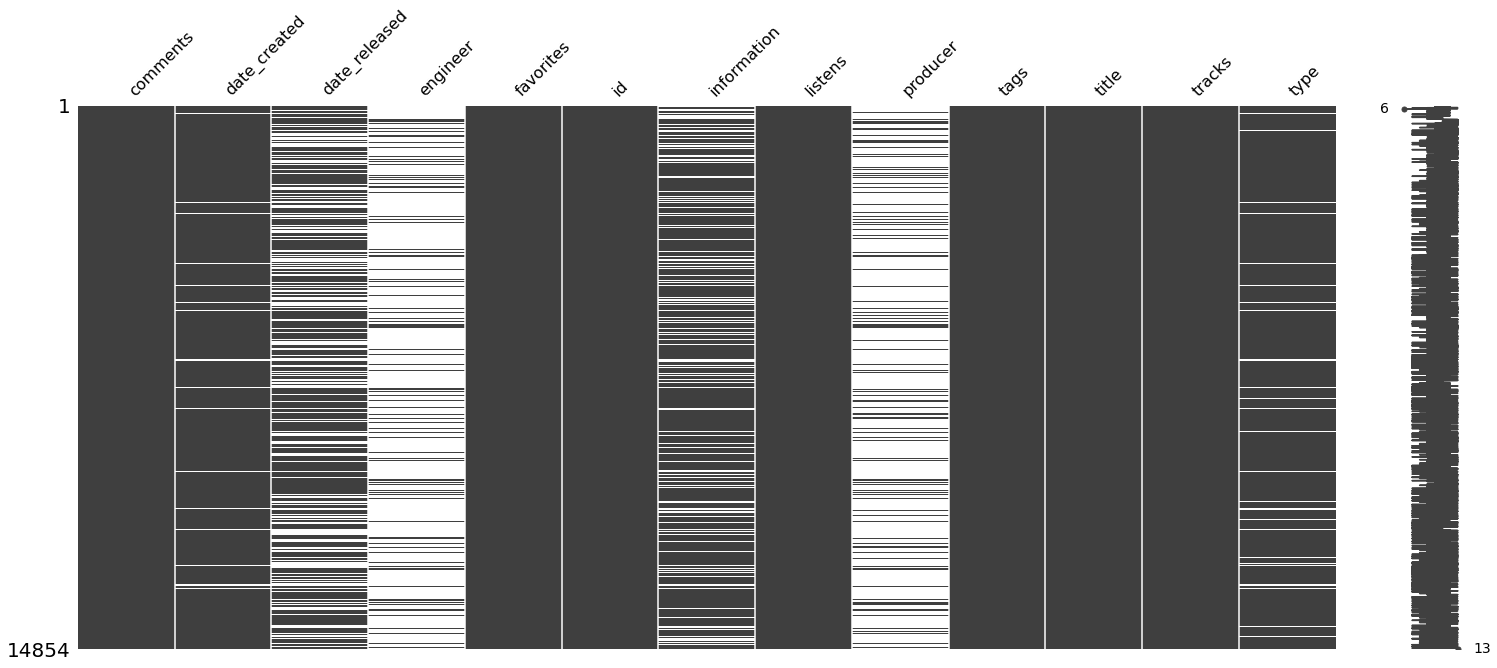

In [341]:
msno.matrix(df_album)

In [287]:
#show summary statistics of variables with numeric measurement (including dates)
df_album.describe(datetime_is_numeric=True, include = 'all')

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
count,14854.000000,14395,9450,2327,14854.000000,14854.000000,11305,1.485400e+04,2603,14854,14853,14854.000000,13940
unique,NaN,NaN,NaN,622,NaN,NaN,11075,NaN,760,2388,14298,NaN,5
top,NaN,NaN,NaN,Ernie Indradat,NaN,NaN,<p>You may use this music for derivative works...,NaN,Joe Belock,[],Live at the 2014 Golden Festival,NaN,Album
freq,NaN,NaN,NaN,128,NaN,NaN,42,NaN,110,12195,30,NaN,11596
mean,0.192877,2012-10-27 01:44:49.393336320,2011-01-06 01:26:23.999995648,NaN,0.899286,12288.975899,NaN,1.583785e+04,NaN,NaN,NaN,8.195570,NaN
min,-1.000000,2008-11-26 01:44:45,1902-01-01 00:00:00,NaN,-1.000000,-1.000000,NaN,-1.000000e+00,NaN,NaN,NaN,-1.000000,NaN
25%,0.000000,2010-08-12 12:42:18,2009-01-23 00:00:00,NaN,0.000000,7209.250000,NaN,1.698250e+03,NaN,NaN,NaN,2.000000,NaN
50%,0.000000,2012-09-08 08:40:47,2011-09-15 00:00:00,NaN,0.000000,12460.500000,NaN,4.869000e+03,NaN,NaN,NaN,6.000000,NaN
75%,0.000000,2015-02-06 17:16:36,2014-02-05 18:00:00,NaN,1.000000,17701.750000,NaN,1.329175e+04,NaN,NaN,NaN,10.000000,NaN
max,53.000000,2017-03-30 15:20:35,2021-03-01 00:00:00,NaN,61.000000,22940.000000,NaN,3.564243e+06,NaN,NaN,NaN,652.000000,NaN


#####  var: album.comments
empty: 0%

analysis:  the variable represents the count of listners' comments present on the ablum page. The majority of the albums have zero comments (+ 80%) and the variable is slightly right skweed. Unusual "-1" values are also present (around 3% of values). We found no possible explanation for this inconsistent variable. We filtered the album df on those values and saw that all the rows where album.comments equal -1 had missing (NaT for the dates vars) or inconsistent (-1 for favorites, listens and tracks vars; which is an inconsistent var as those are var representing a count which should have a natural numeric level of measurement) values. 

data cleaning actions: 
- drop all the rows where album.comments == -1 .

In [343]:
#checked -1 values and dropped them all
df_album.loc[df_album.comments == -1,:].describe(include ='all')

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
count,459.0,0,0,0,459.0,459.000000,0,459.0,0,459,458,459.0,0
unique,NaN,0,0,0,NaN,NaN,0,NaN,0,1,444,NaN,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Fiddlesticks Says The Undead Sloth,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459,4,NaN,NaN
mean,-1.0,NaN,NaN,NaN,-1.0,13912.370370,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
std,0.0,NaN,NaN,NaN,0.0,5419.410259,NaN,0.0,NaN,NaN,NaN,0.0,NaN
min,-1.0,NaN,NaN,NaN,-1.0,-1.000000,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
25%,-1.0,NaN,NaN,NaN,-1.0,9825.000000,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
50%,-1.0,NaN,NaN,NaN,-1.0,13890.000000,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
75%,-1.0,NaN,NaN,NaN,-1.0,18701.500000,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN


In [308]:
#check -1 values
for _ in ids_to_check:
    df_temp =  df.artist.loc[df.artist.id==_]
    if df_temp['active_year_begin'].notna().sum() > 0:
        print('bingo')
        
for _ in ids_to_check:
    df_temp =  df.album.loc[df.album.id==_]
    if df_temp['date_created'].notna().sum() > 0:
        print('pempem')
        
#results: both  -1 values in the album and artist sub df represented a series of rows with almost all absent or invalid data

In [83]:
#data cleaning CODE
df.drop(df.loc[(df.album.comments == -1),:].index, inplace = True)

<AxesSubplot:xlabel='comments', ylabel='count'>

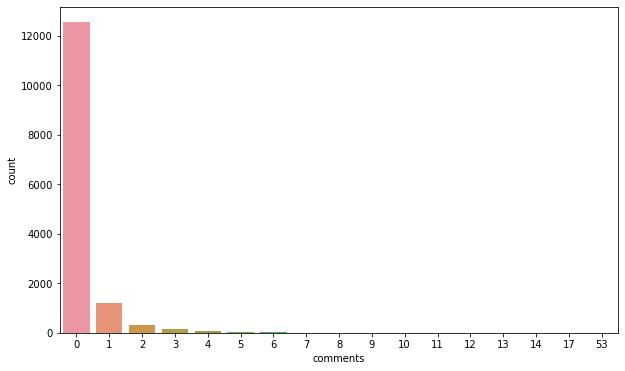

In [526]:
#new album.comments distribution looks like this:
sns.countplot(x = df_album.comments)
#plt.pyplot.savefig('figures/album_comments_distribution.pdf')

##### var: album.date_created
empty: 3%

analysis: values are distributed between 2008 and 2017. At first glance the distribution looked fairly equilibrated with a small skew to the left. However, when plotted with smaller bin size, we noticed a spike in song created in late 2008 / early 2009. When focusing in this timeframe, we noticed in particular 2 dates (November 26th and December 4th 2008) where a relatively massive ammount of song creation took place. We tried to interpret such results, especially considering the noticeable difference in distribution with ite neighbouring variable date_released (showed in Fig X). After a quick search, we realised that the Free Music Archive, the free online music depository from which the dataset was created, was created in early 2009 and figured that the variable album.date_created refers to the date when the album was uploaded on the FMA website. Furthermore, the values have a high degree of precision with minutes and seconds measurement scale, which indicates that this value was automatically generated by the platform when the songs were uploaded.

data quality decision:
- use it to fill album.date_released (see album.date_released)
- consider dropping variable

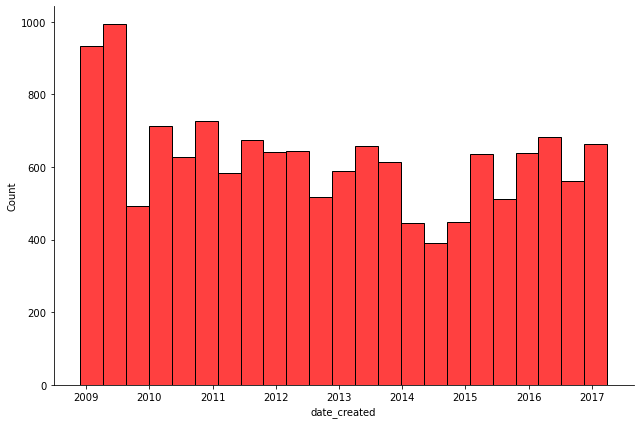

In [366]:
sns.displot(df_album.date_created, height = 6, aspect = 1.5, color = 'red')

In [19]:
sns.set_context("notebook", font_scale=1.1)

[Text(0.5, 1.0, 'Album date released kde')]

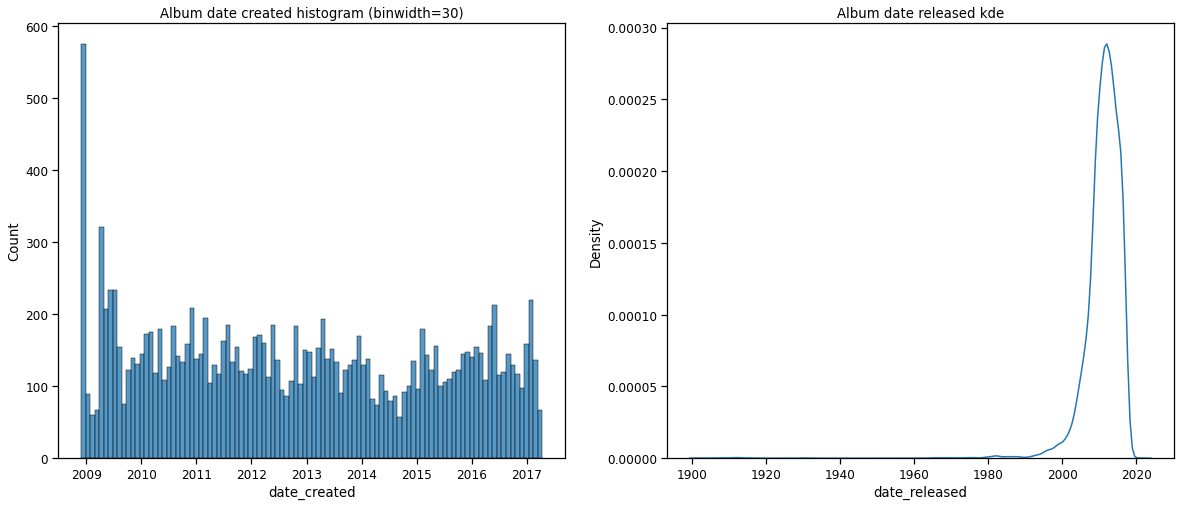

In [47]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(df_album.date_created,  binwidth = 30, ax = ax[0]).set(title='Album date created histogram (binwidth=30)')
sns.kdeplot(df_album.date_released,  ax = ax[1]).set(title='Album date released kde')

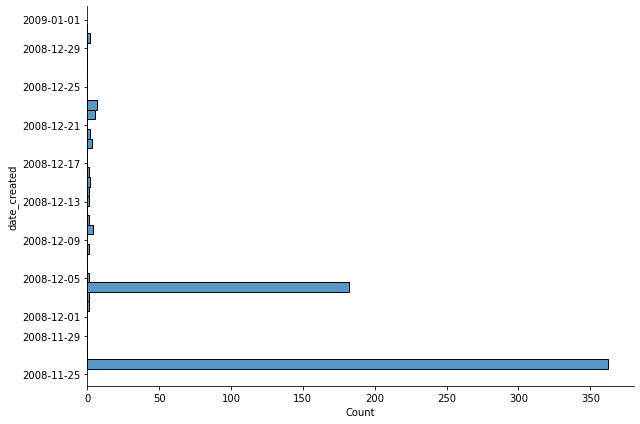

In [60]:
sns.displot(y= df_album.date_created.loc[df_album.date_created < pd.Timestamp(2009,1,1)], height = 6, aspect = 1.5, discrete = True)

In [427]:
df_album.date_created.dt.date.value_counts()

2008-11-26    362
2008-12-04    182
2009-06-10     38
2009-04-02     36
2009-01-09     36
             ... 
2011-04-06      1
2009-12-20      1
2014-03-14      1
2014-10-13      1
2013-08-11      1
Name: date_created, Length: 2801, dtype: int64

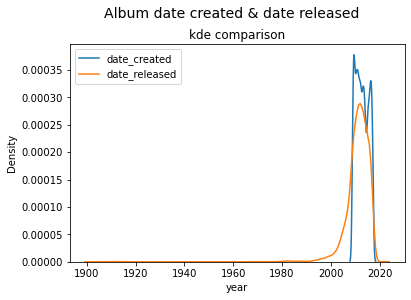

In [496]:
fig, ax = plt.subplots()
sns.kdeplot(df_album.date_created)
sns.kdeplot(df_album.date_released)
ax.set_title('kde comparison')
ax.set_xlabel('year')
fig.suptitle('Album date created & date released', size = 14, x= 0.5, y = 1.01)
ax.legend(['date_created','date_released'])

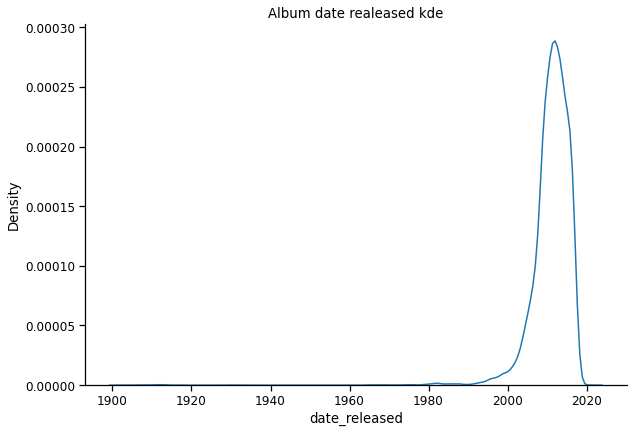

In [28]:
sns.displot(df_album.date_released, height = 6, aspect = 1.5,  kind='kde').set(title='Album date realeased kde')

In [13]:
df.album.date_created

track_id
2        2008-11-26 01:44:45
3        2008-11-26 01:44:45
5        2008-11-26 01:44:45
10       2008-11-26 01:45:08
20       2008-11-26 01:45:05
                 ...        
155316   2017-03-30 15:20:35
155317   2017-03-30 15:20:35
155318   2017-03-30 15:20:35
155319   2017-03-30 15:20:35
155320   2017-03-26 16:22:18
Name: date_created, Length: 103045, dtype: datetime64[ns]

In [15]:
#data cleaning CODE
df.drop(columns= [('album','date_created')], inplace =  True)

##### var: df_album.date_released
empty: 33%

analysis: df_album.date_released has very wide distribution, ranging from from 1902 ("Piano Rolls from archive.org", Scott Joplin) to march 2021 ("Grey River", Blue Dot sessions). From visualizing the distribution, we can see the vast mojority of albums were released between 2010 & 2017. It is left skeewed with few outliers below 1960 (0.01% for total) and a single album released above 2018 (march 2021). The former upward outlier was checked and was identified as an input error on the FMA platform: the released date appears to be march 2021 however the upload date was march 2015. Further research online identified that the Album in question ("Grey River") was actually released on march 2015.

We further studied the differences between date_created (date uploaded on the platform) and date_released and found that around 6% of albums have a creation date prior to the release date. (ie: the album was uploaded on the platform before being released); which is theorically an inconsistency. By comparing data of the FMA with other available online data, we further discovered that (as in the case with "Grey River" album) when there was inconsistency between the upload and release attributes, the latter was wrong whilst the former (upload date) was actually a good approximation of the realease date. Indeed, whilst the upload date looks 100% reliable as it appears to be generated automatically, the release date looks like an attribute which was manually input by the artist when uploading and could therefore contain an error. With multiple random checks, we asserted that, for rows where date_released > date_created of an album, we can use the date_created variable (upload date) as a good approximation of the release date.

data quality decision:
- 2021 error alum could be left or replaced with correct date ?
- for rows where date_released > date_created: replace values with values from date_created
- fillna

In [907]:
df.loc[df.album.date_released >= pd.Timestamp(2021,1,1)]

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
116487          0 2015-03-16 14:45:09    2021-03-01      NaN         0  17932   
116488          0 2015-03-16 14:45:09    2021-03-01      NaN         0  17932   
116489          0 2015-03-16 14:45:09    2021-03-01      NaN         0  17932   
116490          0 2015-03-16 14:45:09    2021-03-01      NaN         0  17932   
116491          0 2015-03-16 14:45:09    2021-03-01      NaN         0  17932   

                                                                              \
                                                information listens producer   
track_id                                                                       
116487    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116488    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116489    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116490    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116491    <p><strong><span style="font-size: medium; lin...   18090      NaN   

                                                   artist                  \
         tags       title tracks   type active_year_begin active_year_end   
track_id                                                                    
116487     []  Grey River      5  Album               NaT             NaT   
116488     []  Grey River      5  Album               NaT             NaT   
116489     []  Grey River      5  Album               NaT             NaT   
116490     []  Grey River      5  Album               NaT             NaT   
116491     []  Grey River      5  Album               NaT             NaT   

                                                                               \
         associated_labels                                                bio   
track_id                                                                        
116487                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116488                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116489                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116490                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116491                 NaN  <p><a title="Blue Dot Website" href="/contribu...   

                                                                          \
         comments        date_created favorites     id latitude location   
track_id                                                                   
116487         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116488         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116489         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116490         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116491         11 2015-02-03 12:05:36       245  19461      NaN      NaN   

                                                                \
         longitude members               name related_projects   
track_id                                                         
116487         NaN     NaN  Blue Dot Sessions              NaN   
116488         NaN     NaN  Blue Dot Sessions              NaN   
116489         NaN     NaN  Blue Dot Sessions              NaN   
116490         NaN     NaN  Blue Dot Sessions              NaN   
116491         NaN     NaN  Blue Dot Sessions              NaN   

                                                                   \
                         tags                             website   
track_id                                                            
116487    [blue dot sessions]  http://www.sessions.blue/sessions/   
116488    [blue dot sessions]  http://www.

In [909]:
df.loc[df.album.date_released >= pd.Timestamp(2021,1,1),('album','date_released')] = pd.Timestamp(2015,3,1)

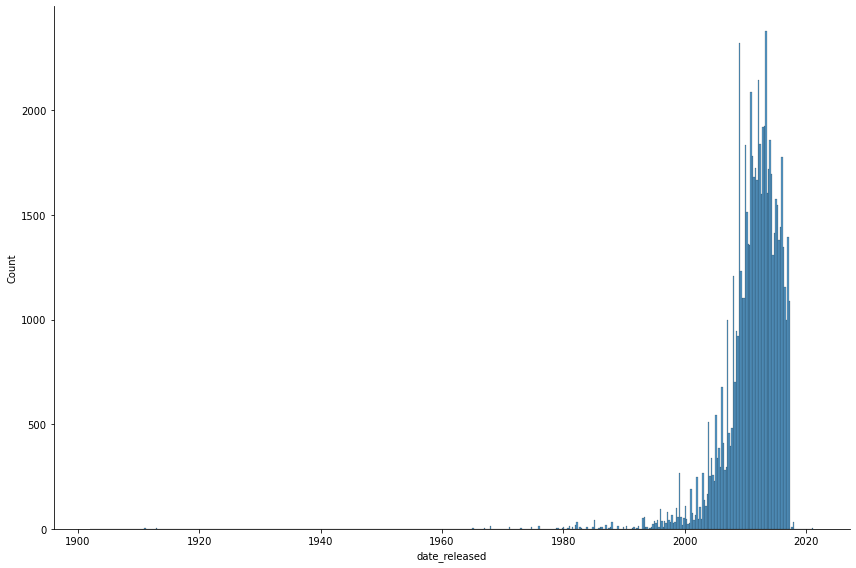

In [217]:
sns.displot(df.album.date_released, height= 8, aspect=1.5)

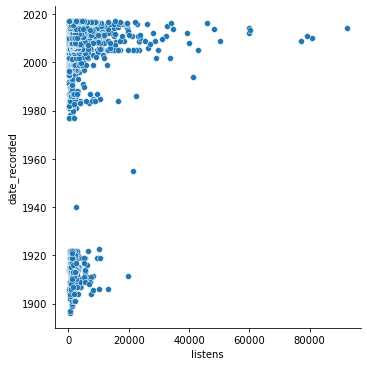

In [220]:
sns.relplot(x = df.track.listens, y = df.track.date_recorded)

In [40]:
df.loc[df.album.date_released >= pd.Timestamp(2018,1,1)]

album                                          \
         comments date_released engineer favorites     id   
track_id                                                    
116487          0    2021-03-01      NaN         0  17932   
116488          0    2021-03-01      NaN         0  17932   
116489          0    2021-03-01      NaN         0  17932   
116490          0    2021-03-01      NaN         0  17932   
116491          0    2021-03-01      NaN         0  17932   

                                                                              \
                                                information listens producer   
track_id                                                                       
116487    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116488    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116489    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116490    <p><strong><span style="font-size: medium; lin...   18090      NaN   
116491    <p><strong><span style="font-size: medium; lin...   18090      NaN   

                                                   artist                  \
         tags       title tracks   type active_year_begin active_year_end   
track_id                                                                    
116487     []  Grey River      5  Album               NaT             NaT   
116488     []  Grey River      5  Album               NaT             NaT   
116489     []  Grey River      5  Album               NaT             NaT   
116490     []  Grey River      5  Album               NaT             NaT   
116491     []  Grey River      5  Album               NaT             NaT   

                                                                               \
         associated_labels                                                bio   
track_id                                                                        
116487                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116488                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116489                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116490                 NaN  <p><a title="Blue Dot Website" href="/contribu...   
116491                 NaN  <p><a title="Blue Dot Website" href="/contribu...   

                                                                          \
         comments        date_created favorites     id latitude location   
track_id                                                                   
116487         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116488         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116489         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116490         11 2015-02-03 12:05:36       245  19461      NaN      NaN   
116491         11 2015-02-03 12:05:36       245  19461      NaN      NaN   

                                                                \
         longitude members               name related_projects   
track_id                                                         
116487         NaN     NaN  Blue Dot Sessions              NaN   
116488         NaN     NaN  Blue Dot Sessions              NaN   
116489         NaN     NaN  Blue Dot Sessions              NaN   
116490         NaN     NaN  Blue Dot Sessions              NaN   
116491         NaN     NaN  Blue Dot Sessions              NaN   

                                                                   \
                         tags                             website   
track_id                                                            
116487    [blue dot sessions]  http://www.sessions.blue/sessions/   
116488    [blue dot sessions]  http://www.sessions.blue/sessions/   
116489    [blue dot sessions]  http://www.sessions.blue/sessions/   
116490    [blue dot sessions]  http://www.sessions.blue/sessions

In [227]:
df_album.loc[df_album.date_released <= pd.Timestamp(1960,1,1)]

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
5009,0,2009-01-09 08:48:52,1912-01-01,NaN,0,1711,"<p>Part of the <a href=""http://cylinders.libra...",1900,NaN,[],Edison Amberol: 960,1,Album
5011,0,2009-01-09 14:53:38,1916-01-10,NaN,0,1720,"<p>Part of the <a href=""http://cylinders.libra...",745,NaN,[],Edison Blue Amberol: 2853,1,Album
5015,0,2009-01-09 14:59:22,1911-01-10,NaN,0,1724,"<p>Part of the <a href=""http://cylinders.libra...",1493,NaN,[],Edison Amberol: 678,1,Album
5016,0,2009-01-09 14:59:56,1911-01-10,NaN,0,1725,<p><br /></p>,5713,NaN,[],Edison Amberol Record: 716,1,Single Tracks
5017,0,2009-01-09 15:00:17,1913-01-10,NaN,0,1726,"<p>Part Of the <a href=""http://cylinders.libra...",2343,NaN,[],Edison Bell Record: 20283,1,Album
5018,0,2009-01-09 15:00:50,1909-01-01,NaN,0,1727,"<p><a href=""http://cylinders.library.ucsb.edu""...",1019,NaN,[],Edison Amberol: 126,1,Album
5019,0,2009-01-09 15:01:25,1913-01-10,NaN,0,1728,"<p>Part of the <a href=""http://cylinders.libra...",5437,NaN,[],Edison Blue Amberol: 2052,1,Album
5020,0,2009-01-09 15:01:43,1905-01-10,NaN,0,1729,NaN,1722,NaN,[],Edison Gold Moulded Record: 9154,1,NaN
5022,0,2009-01-09 15:02:36,1907-01-10,NaN,0,1731,"<p>Part of the <a href=""http://cylinders.libra...",4280,NaN,[],Edison Gold Moulded Record: 9665,1,Album


In [24]:
df_album.date_released.describe(datetime_is_numeric=True)

count                             9450
mean     2011-01-06 01:26:23.999995648
min                1902-01-01 00:00:00
25%                2009-01-23 00:00:00
50%                2011-09-15 00:00:00
75%                2014-02-05 18:00:00
max                2021-03-01 00:00:00
Name: date_released, dtype: object

In [187]:
df_album.loc[df_album.date_released >= pd.Timestamp(2017,4,1),'date_released'].dt.date.value_counts()

2017-06-01    1
2017-12-09    1
2017-12-21    1
2017-09-23    1
2017-11-09    1
2021-03-01    1
Name: date_released, dtype: int64

In [189]:
df_album.loc[df_album.date_released >= pd.Timestamp(2017,4,1)]

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
116487,0,2015-03-16 14:45:09,2021-03-01,NaN,0,17932,"<p><strong><span style=""font-size: medium; lin...",18090,NaN,[],Grey River,5,Album
149187,0,2017-01-09 20:02:41,2017-11-09,Matt Marando,0,22233,"<p>A live performance for the Evan ""Funk"" Davi...",2207,"Evan ""Funk"" Davies",[],"Live at WFMU for the Evan ""Funk"" Davies Show, ...",9,Radio Program
150146,0,2017-01-27 16:08:15,2017-09-23,Ernie Indradat,0,22397,<p>A live performance on Marty McSorley's show...,9497,Marty McSorley,[],"Live on WFMU with Marty McSorley, 9/23/2016",11,Live Performance
151381,0,2017-02-07 20:04:57,2017-06-01,NaN,0,22536,NaN,1727,NaN,[],Dark Hearted,1,Album
152682,0,2017-02-17 20:02:54,2017-12-21,NaN,0,22660,NaN,4723,NaN,[],Fum,12,Album
153202,0,2017-02-21 19:57:04,2017-12-09,Glenn Luttman,0,22695,"<p>A live performance at Monty Hall, 12/9/2016...",1293,Monty Hall,[],"Live at Monty Hall, 12/9/2016",10,Live Performance


<AxesSubplot:xlabel='date_created', ylabel='date_released'>

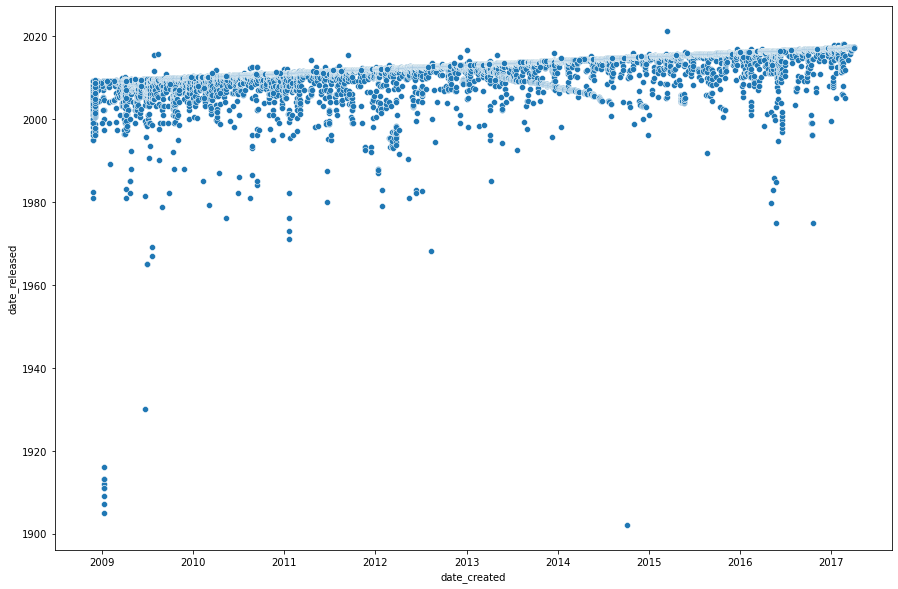

In [234]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x = df_album.date_created, y = df_album.date_released)

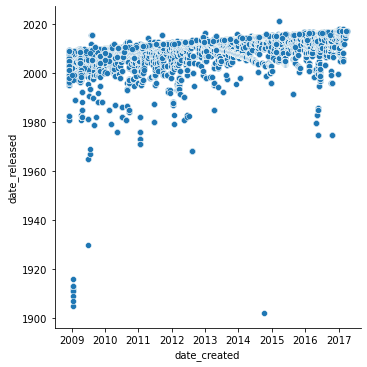

In [17]:
sns.relplot(x = df.album.date_created, y = df.album.date_released)

In [243]:
t = datetime.timedelta(days = 300)
df_album.loc[df_album.date_released > df_album.date_created+t]

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
17479,0,2009-07-28 08:40:53,2015-05-27,NaN,0,3932,NaN,1273,NaN,[],Natural Resources cassette,2,Album
17570,0,2009-07-30 10:08:36,2011-08-22,NaN,0,3963,"<p>Ilya Monosov’s Seven Lucky Plays, Or How To...",2626,NaN,[],"Seven Lucky Plays, or How to Fix Songs for a B...",3,Album
18199,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,"[ultra eczema, new zealand]",I Could Destroy You with a Single Thought,11,Album
18787,1,2009-09-15 16:10:18,2010-09-24,NaN,8,4290,<p><br /></p>,4903,NaN,[],Allergic to Latex,7,Album
27867,0,2010-04-05 00:09:00,2011-09-16,martin croxford: Who You Are,0,6038,<p>Love Songs from Colchester/Rowhedge UK</p><...,4582,Chris Andrews,[],Hedgesongs,7,Album
34309,0,2010-08-20 01:36:07,2012-05-05,NaN,0,7163,<p>Would you believe these are just some unhea...,7275,NaN,[],se,3,Album
34746,0,2010-08-26 08:39:49,2012-08-07,NaN,0,7206,"<!--StartFragment-->\n<p class=""MsoNormal""><sp...",10589,NaN,[],"Brothers, Find Your Brothers/ R.I.P. Now In Life",38,Album
35755,0,2010-09-16 13:16:06,2012-08-03,NaN,0,7337,"<p><!--StartFragment--></p>\n<p class=""MsoNorm...",6022,NaN,[],My Majority,18,Album
35890,0,2010-09-16 14:52:30,2012-08-03,NaN,0,7346,"<p style=""margin: 0.0px 0.0px 0.0px 0.0px; fon...",34780,NaN,[],Campfire on Bubble Mountain,17,Album


In [776]:
#for rows where date_released > date_created: replace values with values from date_created
df.loc[df.album.date_released > df.album.date_created, ('album', 'date_released')] = df.loc[df.album.date_released > df.album.date_created, ('album', 'date_created')]

In [777]:
df.loc[df.album.date_released > df.album.date_created, ('album', 'date_released')]

Series([], Name: (album, date_released), dtype: datetime64[ns])

In [779]:
df.drop(columns = [('album','date_created')], inplace = True)

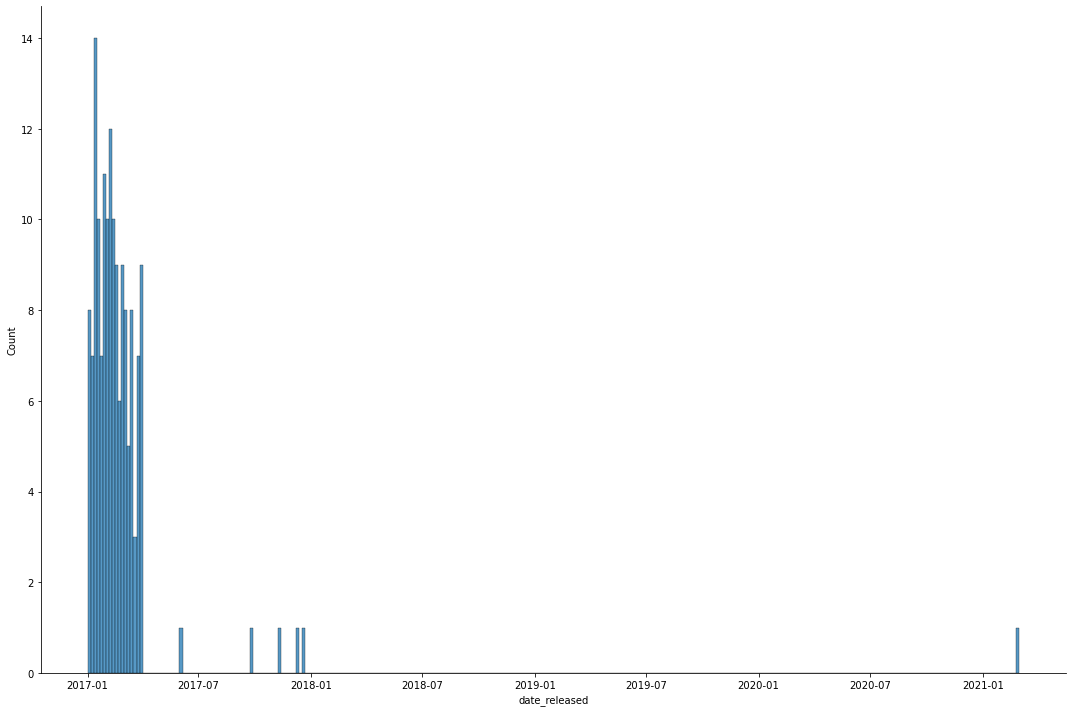

In [184]:
sns.displot(x = df_album.date_released[df_album.date_released >= pd.Timestamp(2017,1,1)], binwidth = 5 ,height = 10, aspect = 1.5)

##### var: album.engineer
empty: 85%

analysis: album.engineer indicats the sound engineer that worked on the production of the album. Highly incomplete (85% + missing values) and there are 622 unique engineers.

decision: encode variable into a binary attribute: 1 if engineer is present, 0 if not

In [251]:
df_album.engineer.dropna().drop_duplicates()

track_id
185                                          Ariel Pink
440                                         Dave Public
610       Brian Mumform (teen sports! no rules! studio)
890                                       self-recorded
2125                                        Jason Engel
                              ...                      
149757                                  Alexei Kalinkin
149943                                           Outrun
150412                Jared C. Balogh and Katy Molinaro
153958                                            Yshwa
155259                                               ps
Name: engineer, Length: 622, dtype: object

In [253]:
df_album.engineer.dropna().value_counts()

Ernie Indradat                                     128
Irene Trudel                                       108
Pennfodralet                                       103
Mike Sin                                            90
Mario Santana                                       89
                                                  ... 
Visager                                              1
ps                                                   1
Jon Flores and Serge Z                               1
Matt LeMay                                           1
Vladimir Grubor, Igor Hadžalić & Goran Grubišić      1
Name: engineer, Length: 622, dtype: int64

In [782]:
#encode variable into a binary attribute: 1 if engineer is present, 0 if not
df.loc[df.album.engineer.isna(),('album','engineer')] = 0
df.loc[df.album.engineer.notna(),('album','engineer')] = 1

##### var: album.favorites
empty: 0%

analysis: album.favorites is a count of all the time the album was added as a favorites by the users of the FMA. The variable has no missing values and is right skweed with the majority (~60%) of the album having value zero. As with album.comments, the variable has a semantic error as it has 3% of values equaling "-1". We noticed the rows where album.favorites == -1 are the same where album.comments == -1.

possible action: 
- no action needed, the rows with inconsistent values are already dropped when cleaning album.comments


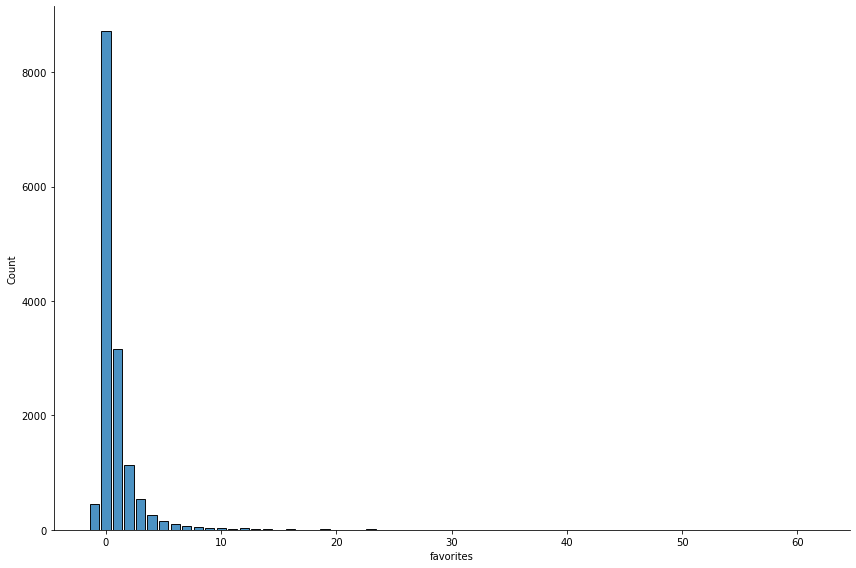

In [85]:
sns.displot(df_album_backup.favorites, height = 8, aspect=1.5, discrete = True, shrink=.8, alpha=.8)

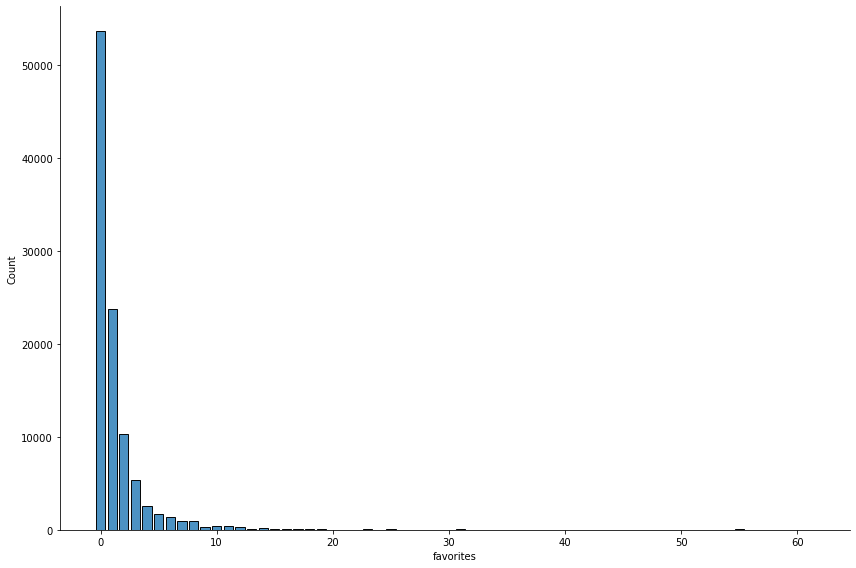

In [84]:
#after dropping all rows where df.album.comments == -1, we can see there are no more df.album.favorites == -1 as well.
sns.displot(df.album.favorites, height = 8, aspect=1.5, discrete = True, shrink=.8, alpha=.8)

In [290]:
df_album.favorites.value_counts()/df_album.favorites.value_counts().sum()

 0     0.586845
 1     0.212872
 2     0.076276
 3     0.035950
-1     0.030901
 4     0.017302
 5     0.010435
 6     0.006800
 7     0.004915
 8     0.003433
 9     0.002154
 10    0.002087
 12    0.001885
 11    0.001346
 14    0.001077
 13    0.000673
 16    0.000539
 23    0.000539
 19    0.000539
 18    0.000337
 25    0.000269
 15    0.000269
 22    0.000202
 24    0.000202
 21    0.000202
 29    0.000202
 17    0.000202
 40    0.000135
 55    0.000135
 38    0.000135
 31    0.000135
 39    0.000135
 20    0.000135
 27    0.000067
 26    0.000067
 43    0.000067
 47    0.000067
 28    0.000067
 33    0.000067
 36    0.000067
 60    0.000067
 37    0.000067
 61    0.000067
 54    0.000067
Name: favorites, dtype: float64

##### var: album.information
empty: 24%

analysis: raw html information text displayed on the FMA website. Highly mixed values and hard to discern usefull information. 

action: drop it

In [297]:
df_album.information.isna().sum()/len(df_album)

0.23892554194156457

In [298]:
df_album.information.value_counts()

<p>You may use this music for derivative works like videos, presentations, or games, as long as you give appropriate and unambiguous <span style="text-decoration:underline;">credit</span> in your work, i.e. the name of the artist, the title of the track, and the link to the album. The artist encourages sharing the link to your work, if possible, via the comment section for this Free Music Archive entry.</p>\n<p><strong>Licensing requests:</strong> click on the artist's name, then click the link "Contact artist", or the button "Email this artist". The email form will appear.</p>\n<p><strong>Donations:</strong> click on the artist's name, then click the "$" button in the upper right corner of the page. Your support is appreciated very much!</p>                                                                                                                                                                                                                                                        

In [784]:
#drop album.information
df.drop(columns = [('album','information')], inplace = True)

##### var: album.listens
empty: 0%

analysis: extremely high range of values: from 0 to 3.5 millions. Extremely right skeewed, with 98 % of albums having less than 0.1 million listens. The variable also represents a Pareto distribution as 20 % of albums have roughly 80 % of all the listenings. The var had some -1 values, but as with album.comments and album.favorites, they were dropped when cleaning album.comments.

data quality actions:
- none needed
- consider log scaling to reduce high range of variable

In [114]:
df_album.listens.describe()

count    1.439500e+04
mean     1.634289e+04
std      5.520759e+04
min      1.700000e+01
25%      1.912500e+03
50%      5.120000e+03
75%      1.367450e+04
max      3.564243e+06
Name: listens, dtype: float64

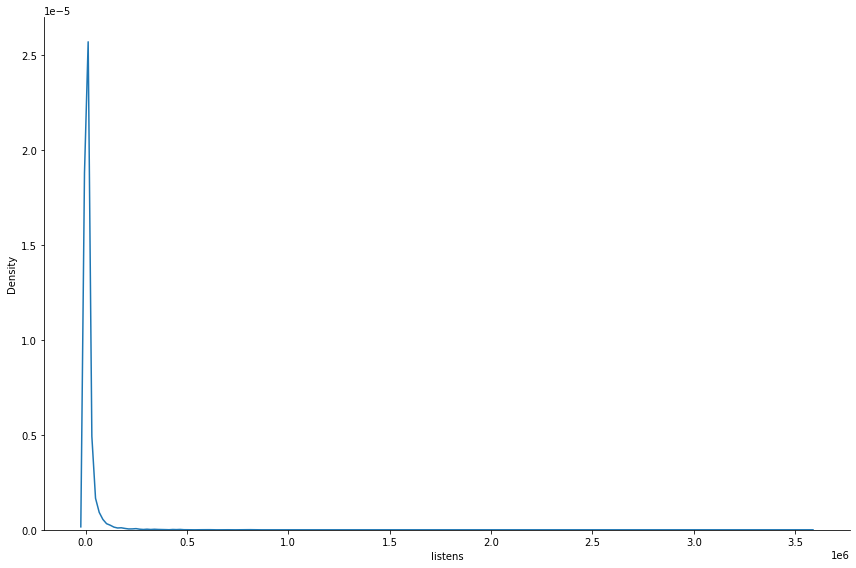

In [14]:
sns.displot(df_album.listens, height = 8, aspect = 1.5, kind='kde')

In [144]:
len(df_album.loc[df_album.listens<=0.1e+06])/len(df_album)

0.975755470649531

In [119]:
df_album.listens.sum()

235255886

In [132]:
round(0.20 * len(df_album))

2879

In [134]:
df_album.listens.sort_values(ascending = False)

track_id
73835    3564243
86589    1553769
97146    1363291
52651    1282752
50893    1193803
          ...   
1216          34
9334          26
9181          25
9331          19
9223          17
Name: listens, Length: 14395, dtype: int64

In [133]:
df_album.listens.sort_values(ascending = False)[:2879].sum()/df_album.listens.sum()

0.7564811279578356

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df_album.date_created)
sns.kdeplot(df_album.date_released)
ax.set_title('kde comparison')
ax.set_xlabel('year')
fig.suptitle('Album date created & date released', size = 14, x= 0.5, y = 1.01)
ax.legend(['date_created','date_released'])

Text(0.5, 1.0, "Tracks' listens Boxplot")

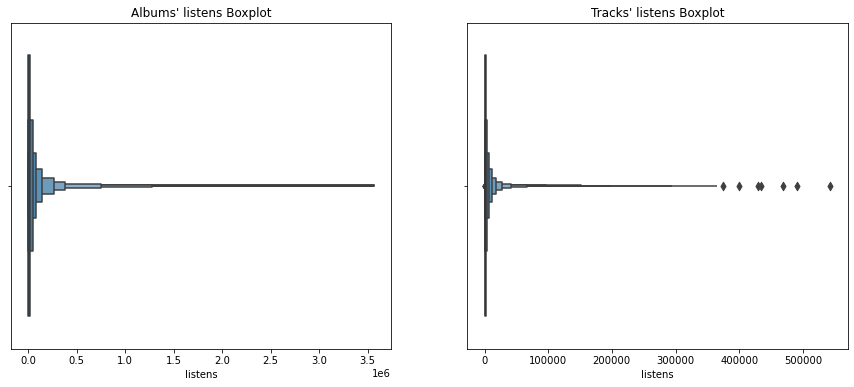

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxenplot(data = df.album, x = 'listens', ax=ax[0])
ax[0].set_title('Albums\' listens Boxplot')
sns.boxenplot(data = df.track, x = 'listens', ax=ax[1])
ax[1].set_title('Tracks\' listens Boxplot')

Text(0.5, 1.0, "Albums' listens Boxplot")

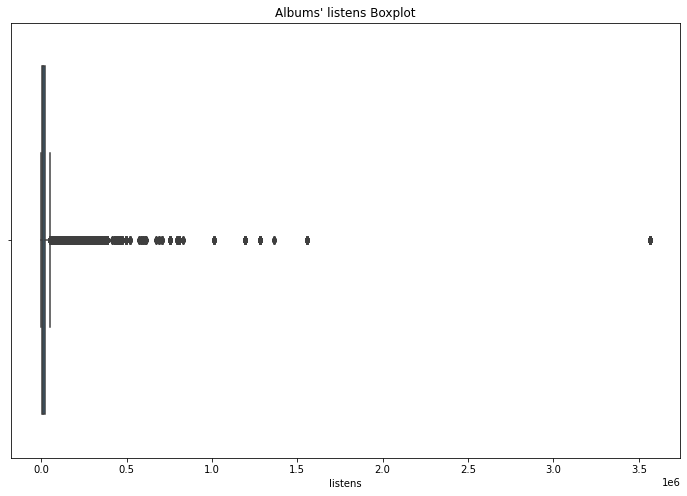

In [21]:
fig, ax = plt.subplots()
sns.boxplot(data = df.album, x = 'listens')
ax.set_title('Albums\' listens Boxplot')

##### var: album.producer
empty: 83%

analysis: album.producer indicates the sound engineer that worked on the production of the album. Highly incomplete (83% + missing values) and there are 760 unique engineers.

decision: 
- encode variable into a binary attribute: 1 if producer is present, 0 if not

In [145]:
df_album.producer.describe()

count           2603
unique           760
top       Joe Belock
freq             110
Name: producer, dtype: object

In [785]:
#encode variable into a binary attribute: 1 if producer is present, 0 if not
df.loc[df.album.producer.isna(),('album','producer')] = 0
df.loc[df.album.producer.notna(),('album','producer')] = 1

##### var: album.tags
empty: 81%

analysis: tags that the artist associated with the album. There are semantically many different types of tags, from genre of music to country/city and artist name. The tags them self could potentially be usefull however the variable has an excessive number of missing values rendering any usage not possible.

decision: drop it

In [146]:
df_album.tags.describe()

count     14395
unique     2388
top          []
freq      11736
Name: tags, dtype: object

In [155]:
df_album.tags.astype('str').unique()[:10]

array(['[]', "['lafms']", "['baltimore']", "['portland', 'pdx']",
       "['sound collage']", "['noise', 'soundscapes', 'experimental']",
       "['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']",
       "['avant garde', 'experimental', 'noise', 'san francisco', 'big city orchestrae', 'big city orchestrae womens auxiliary', 'american cassette noise network', 'baltimore']",
       "['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil']",
       "['new orleans']"], dtype=object)

In [156]:
df_album.tags.astype('str').value_counts()

[]                                                                                                                                11736
['era 1']                                                                                                                            47
['new zealand']                                                                                                                      17
['holiday music']                                                                                                                    16
['experimental', 'beacon', 'improv', 'soundscapes', 'cinematic', 'noise']                                                            15
                                                                                                                                  ...  
['jamstik']                                                                                                                           1
['psychedelic', 'finnish underground', 'experime

In [163]:
11736/len(df_album)

0.8152830844043071

In [159]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [162]:
to_1D(df_album.tags).value_counts()

experimental               386
electronic                 266
noise                      185
instrumental               160
ambient                    150
                          ... 
music for hockey arenas      1
roit folk                    1
kendrick                     1
the ex                       1
naught vs nice               1
Length: 4926, dtype: int64

##### var: album.tracks
empty: 0%

analysis: number of tracks present in the album. Highly right skweed, with 5% of statistical outliers. Highest outlier (album "Classwar Karaoke - 0025 Survey") supposedly has 652 tracks; however, on our dataset the album only appears to have 133 tracks. After searching the album online on the FMA website and on other website (https://music.humanoids.be/library/albums/4417/), we found that the album actually only has 133 tracks. Similar errors were seen when we searched for the next dozen outliers albums: all had less tracks than declared.
We noticed that the actual number of tracks per album could be asserted from the number of an album's tracks present on our dataset. 

action: 
- replace all values with the number of tracks present on our dataset for a given album
- or leave as it is for outlier detection

In [166]:
df_album.tracks.describe()

count    14395.000000
mean         8.488781
std         12.542807
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max        652.000000
Name: tracks, dtype: float64

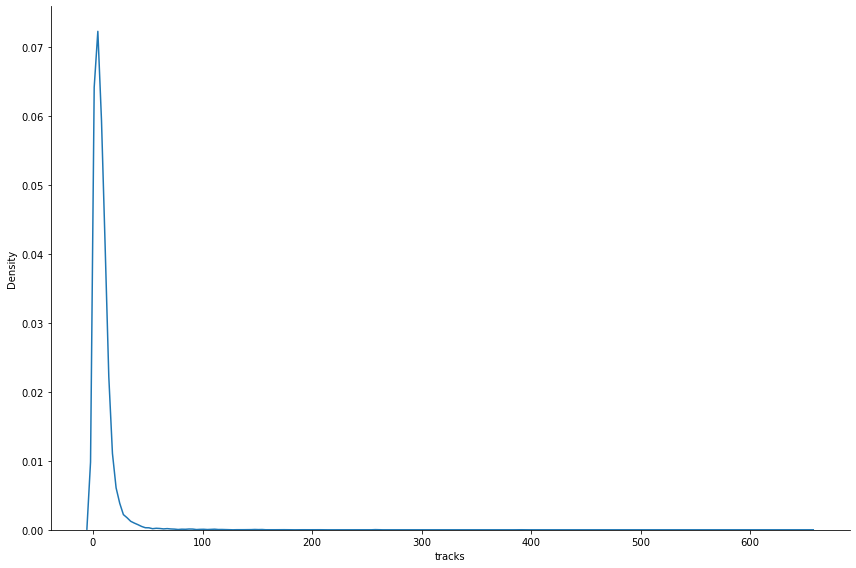

In [191]:
sns.displot(df_album.tracks, height= 8,  aspect = 1.5, kind='kde')

<AxesSubplot:xlabel='tracks', ylabel='count'>

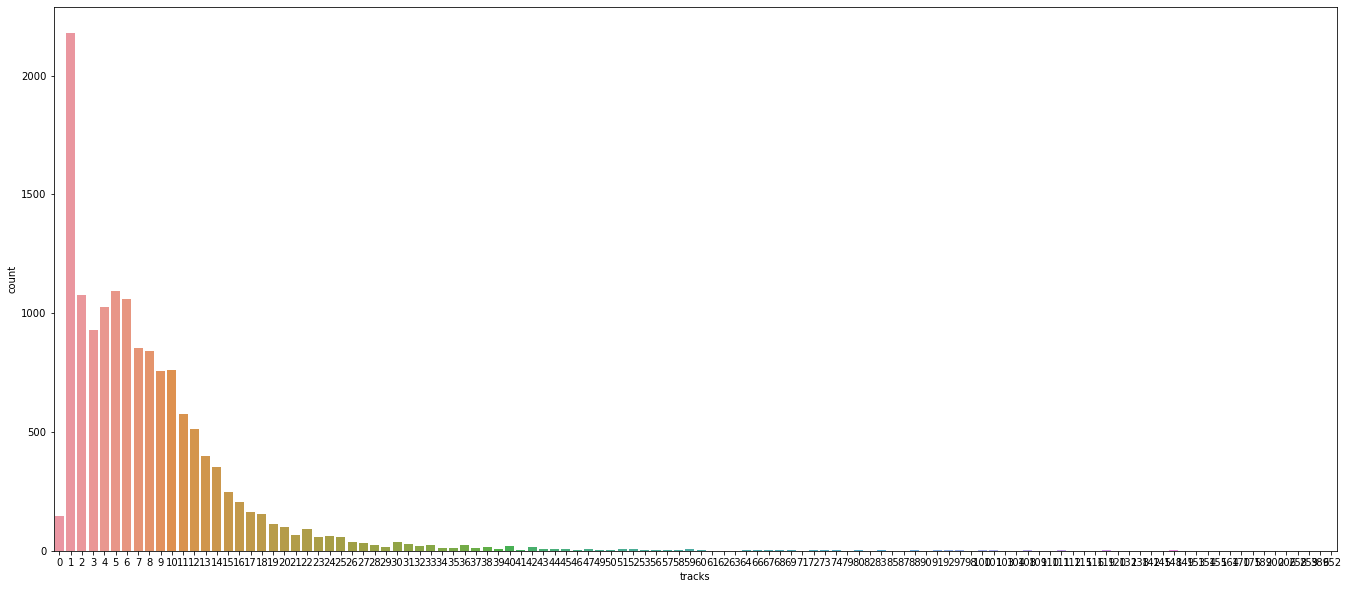

In [188]:
plt.subplots(figsize = (23,10))
sns.countplot(x = df_album.tracks)

<AxesSubplot:xlabel='tracks'>

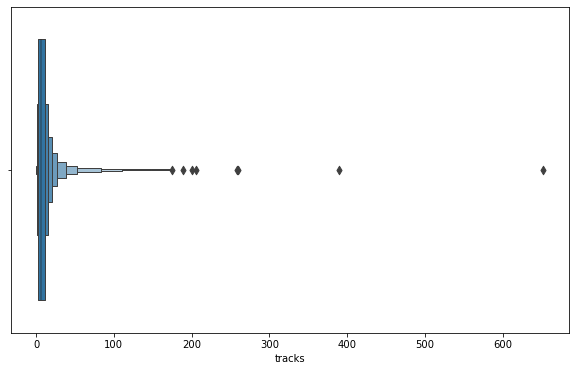

In [195]:
sns.boxenplot(x = df_album.tracks)

In [202]:
df_album.tracks.sort_values(ascending = False)

track_id
99875     652
113593    389
61352     259
95030     258
92960     206
         ... 
3541        0
3424        0
3368        0
3316        0
16890       0
Name: tracks, Length: 14395, dtype: int64

In [218]:
len(df_album.loc[df.album.tracks > 23])

628

In [219]:
len(df_album.loc[df.album.tracks > 23])/len(df_album)

0.04362625911774922

In [200]:
#album Classwar Karaoke - 0025 Survey -> has only 135 songs (verified online: https://music.humanoids.be/library/albums/4417/)
df.album.loc[df.album.tracks == 652]

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
99875,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
99879,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
99890,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
99891,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
99893,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100380,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
100381,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album
100382,14,2014-02-28 10:03:48,2014-02-28,NaN,5,16098,NaN,58483,NaN,[],Classwar Karaoke - 0025 Survey,652,Album


In [207]:
df.album.loc[df.album.tracks == 389]

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
113593,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
113650,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
113651,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
113657,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
113658,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115512,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
115513,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album
115515,3,2015-01-26 13:04:57,NaT,NaN,8,17509,"<p class=""p1"" style=""margin: 0px; padding: 8px...",325595,NaN,"[interiors c1964, existential, hardcore-punk, ...",microSong Entries,389,Album


In [899]:
#has only 50 songs: https://anitek.bandcamp.com/album/sights-sounds
df.album.loc[df.album.tracks == 206].index

Int64Index([92960, 92961, 92963, 92964, 92965, 92966, 92967, 92968, 92969,
            92970, 92971, 92972, 92973, 92974, 92975, 92976, 92977, 92978,
            92979, 92980, 92981, 92982, 92983, 92984, 92985, 92986, 92987,
            92988, 92989, 92990, 92991, 92992, 92993, 92994, 92995, 92996,
            92997, 92998, 92999, 93000, 93001, 93002, 93003, 93004, 93005,
            93006, 93007, 93008, 93009, 93010],
           dtype='int64', name='track_id')

In [900]:
num_tracks = df.album.loc[92960, 'tracks']

In [901]:
num_tracks

206

In [ ]:
df.album.loc[_, 'tracks'] = len(df.album.loc[df.album.tracks == num_tracks])

In [903]:
for _ in df.index:
    num_tracks = df.album.loc[_, 'tracks']
    df.loc[_, ('album','tracks')] = len(df.album.loc[df.album.tracks == num_tracks])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-903-56bdfe0c5d31>", line 3, in <module>
    df.loc[_, ('album','tracks')] = len(df.album.loc[df.album.tracks == num_tracks])
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/common.py", line 65, in new_method
    return method(self, other)
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 370, in wrapper
    res_values = comparison_op(lvalues, rvalues, op)
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py", line 251, in comparison_op
    res_values = na_arithmetic_op(lvalues, rvalues, op, is_cmp=True)
  File "/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py", line 143, in na_arithmetic_op
    result = expressions.evaluate(op, left, right)
  File "/opt/anaconda3/li

TypeError: object of type 'NoneType' has no len()

##### var: album.type
empty: 6%

analysis: the attribute has 5 unique values ('Album', 'Single Tracks', 'Live Performance', 'Radio Program', 'Contest'). The vast mojority being 'Album' (~83%).

action: fill empty  after checking there is no correlation between other missing values (with missingno heatmap)

In [ ]:
df.loc[df.album.type=]

In [810]:
df.groupby([('album','tracks')])


KeyboardInterrupt



In [808]:
x = df.groupby([('album','tracks')])
x[('album','id')]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


KeyError: "Columns not found: 'album', 'id'"

In [804]:
df

album                                             \
         comments engineer favorites     id listens producer   
track_id                                                       
2               0        1         4      1    6073        1   
3               0        1         4      1    6073        1   
5               0        1         4      1    6073        1   
10              0        1         4      6   47632        1   
20              0        1         2      4    2710        1   
...           ...      ...       ...    ...     ...      ...   
155316          0        1         0  22940    1506        1   
155317          0        1         0  22940    1506        1   
155318          0        1         0  22940    1506        1   
155319          0        1         0  22940    1506        1   
155320          0        1         1  22906    7481        1   

                                                             \
                                                       tags   
track_id                                                      
2                                                        []   
3                                                        []   
5                                                        []   
10                                                       []   
20                                                       []   
...                                                     ...   
155316                                                   []   
155317                                                   []   
155318                                                   []   
155319                                                   []   
155320    [ballad, epic, rockabilly, curse, hex, hard ro...   

                                                                  \
                                  title tracks              type   
track_id                                                           
2                  AWOL - A Way Of Life      7             Album   
3                  AWOL - A Way Of Life      7             Album   
5                  AWOL - A Way Of Life      7             Album   
10                    Constant Hitmaker      2             Album   
20                                Niris     13             Album   
...                                 ...    ...               ...   
155316    Live at Monty Hall, 2/17/2017      6  Live Performance   
155317    Live at Monty Hall, 2/17/2017      6  Live Performance   
155318    Live at Monty Hall, 2/17/2017      6  Live Performance   
155319    Live at Monty Hall, 2/17/2017      6  Live Performance   
155320        What I Tell Myself Vol. 2     11             Album   

                    artist                  \
         active_year_begin active_year_end   
track_id                                     
2               2006-01-01             NaT   
3               2006-01-01             NaT   
5               2006-01-01             NaT   
10                     NaT             NaT   
20              1990-01-01      2011-01-01   
...                    ...             ...   
155316                 NaT             NaT   
155317                 NaT             NaT   
155318                 NaT             NaT   
155319                 NaT             NaT   
155320                 NaT             NaT   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   
...                                                     ...   
155316                                                  NaN   
1553

<AxesSubplot:>

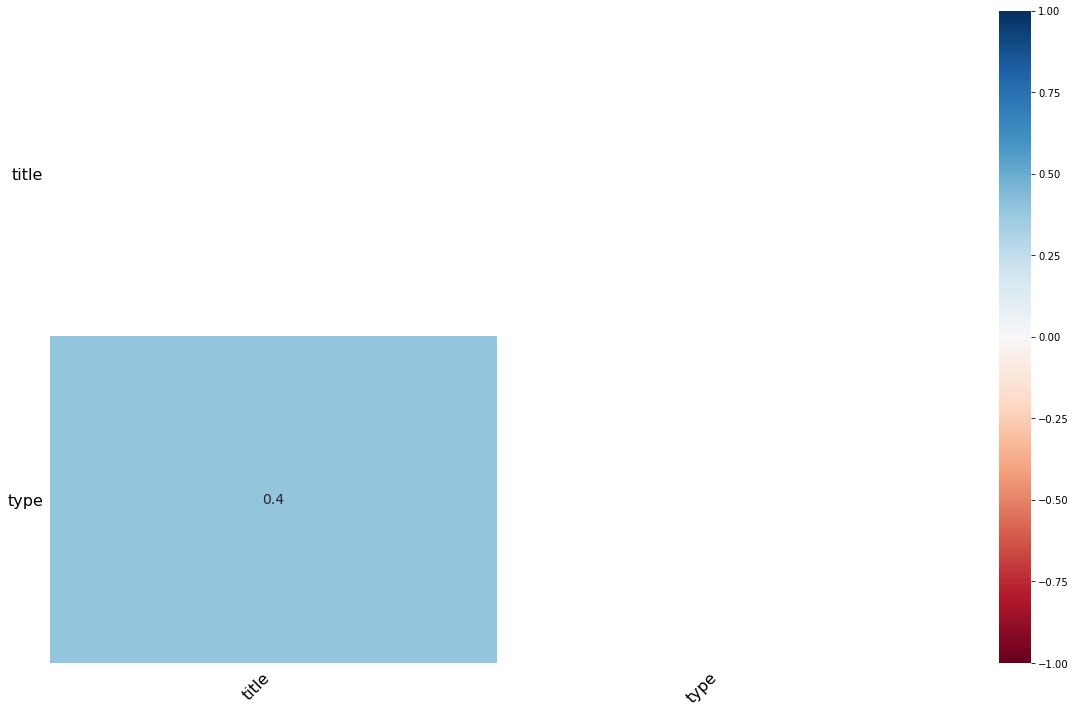

In [786]:
df.groupby(['genre_top','MaritalStatus'])['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [236]:
df_album.type.value_counts()

Album               11596
Live Performance     1043
Radio Program        1002
Single Tracks         298
Contest                 1
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

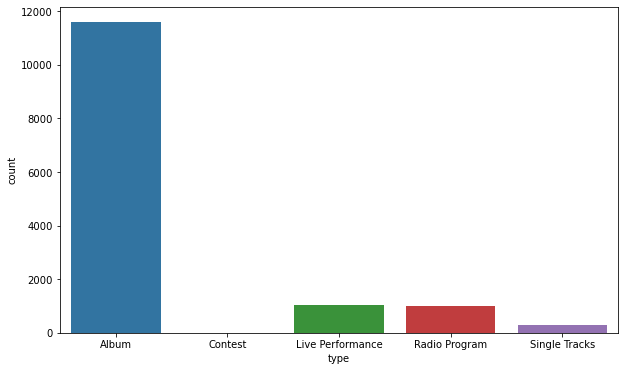

In [226]:
sns.countplot(x = df_album.type)

In [230]:
df_album.type.unique()

['Album', 'Single Tracks', 'Live Performance', 'Radio Program', NaN, 'Contest']
Categories (5, object): ['Album', 'Single Tracks', 'Live Performance', 'Radio Program', 'Contest']

#### tracks.artist

In [247]:
df_artist = df.artist.copy().drop_duplicates(subset = ['id'])

In [530]:
 df.artist.copy().drop_duplicates(subset = ['id']).shape

(16109, 17)

In [533]:
df.artist.copy().drop_duplicates(subset=['id','latitude','longitude','location']).shape

(16109, 17)

In [251]:
df_artist_backup = df_artist.copy()

<AxesSubplot:>

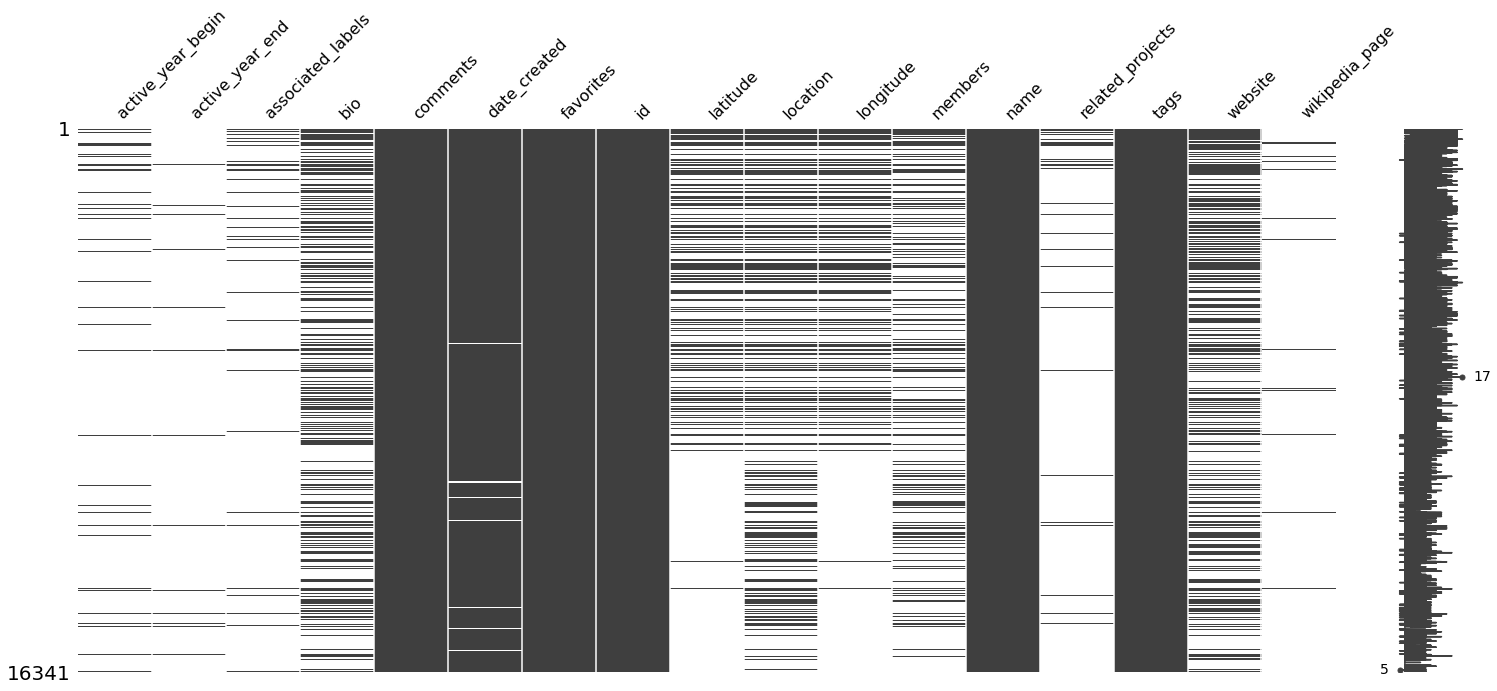

In [249]:
msno.matrix(df_artist)

In [250]:
df_artist.describe(datetime_is_numeric=True, include = 'all')

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
count,1254,321,862,6140,16341.000000,16109,16341.000000,16341.000000,3836.000000,6033,3836.000000,4069,16341,762,16341,6945,392
unique,NaN,NaN,754,6084,NaN,NaN,NaN,NaN,NaN,2329,NaN,4015,16294,752,15660,6642,389
top,NaN,NaN,R.A.I.G.,<p><br /></p>,NaN,NaN,NaN,NaN,NaN,"Brooklyn, NY",NaN,Jan Strach,(none given),running,[],www.beehiverecording.com,http://en.wikipedia.org/wiki/Bliss_Blood
freq,NaN,NaN,13,32,NaN,NaN,NaN,NaN,NaN,294,NaN,7,3,2,561,22,2
mean,1999-10-08 14:39:37.033491840,1999-05-24 12:24:40.373831808,NaN,NaN,0.248149,2012-07-22 05:58:38.100690432,3.459703,13092.781776,38.023031,NaN,-37.298810,NaN,NaN,NaN,NaN,NaN,NaN
min,1903-01-01 00:00:00,1903-01-01 00:00:00,NaN,NaN,-1.000000,2008-11-26 01:42:32,-1.000000,1.000000,-45.878760,NaN,-157.526855,NaN,NaN,NaN,NaN,NaN,NaN
25%,1998-01-01 00:00:00,1999-01-01 00:00:00,NaN,NaN,0.000000,2010-05-14 11:06:54,0.000000,7532.000000,37.777125,NaN,-81.903065,NaN,NaN,NaN,NaN,NaN,NaN
50%,2004-01-01 00:00:00,2007-01-01 00:00:00,NaN,NaN,0.000000,2012-04-22 12:06:37,0.000000,13502.000000,40.714550,NaN,-73.923249,NaN,NaN,NaN,NaN,NaN,NaN
75%,2008-01-01 00:00:00,2012-01-01 00:00:00,NaN,NaN,0.000000,2014-08-11 14:01:20,2.000000,18912.000000,46.520497,NaN,5.308513,NaN,NaN,NaN,NaN,NaN,NaN
max,2016-01-01 00:00:00,2086-01-01 00:00:00,NaN,NaN,79.000000,2017-03-30 15:18:28,963.000000,24357.000000,67.286005,NaN,175.277000,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
df_artist.active_year_begin.isna().sum()/len(df_artist)

0.9232605103726822

<AxesSubplot:xlabel='active_year_begin', ylabel='Count'>

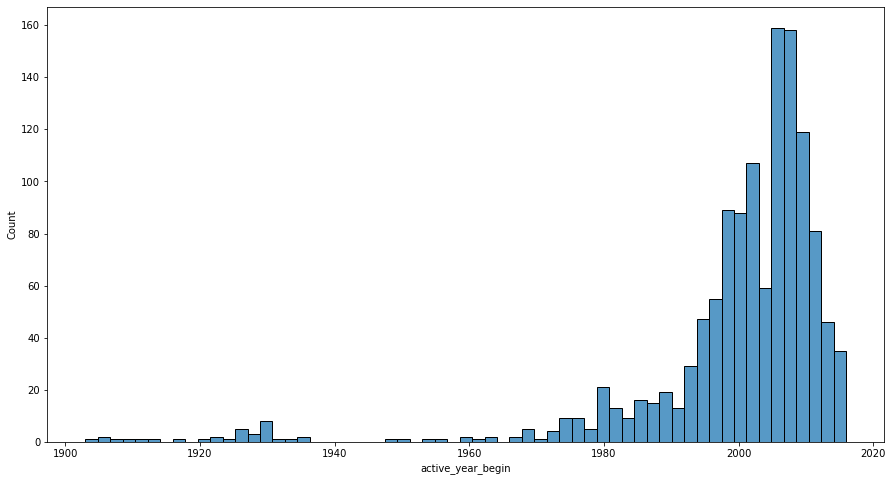

In [256]:
plt.subplots(figsize=(15,8))
sns.histplot(df_artist.active_year_begin)

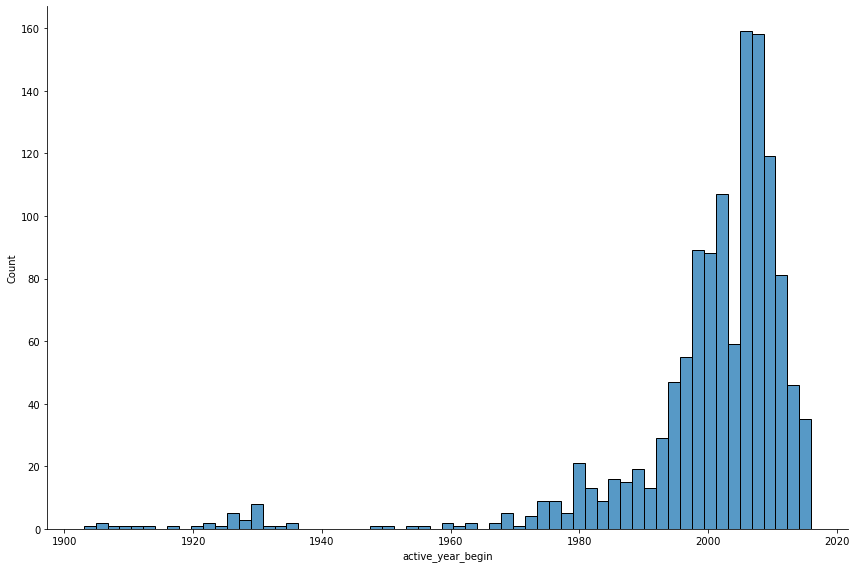

In [257]:
sns.displot(df_artist.active_year_begin, height = 8, aspect= 1.5)

<AxesSubplot:xlabel='comments'>

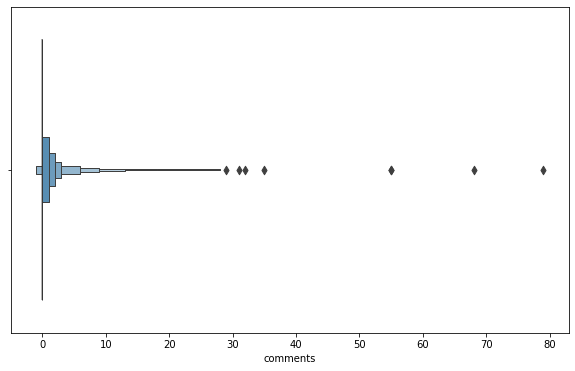

In [265]:
sns.boxenplot(x = df_artist.comments)

In [266]:
df_artist.active_year_end.isna().sum()/len(df_artist)

0.9803561593537727

In [267]:
df_artist.associated_labels.isna().sum()/len(df_artist)

0.9472492503518757

In [271]:
df_artist.bio.isna().sum()/len(df_artist)

0.6242580013463068

In [270]:
df_artist.bio

track_id
2         <p>A Way Of Life, A Collective of Hip-Hop from...
10        <p><span style="font-family:Verdana, Geneva, A...
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...
135                                                     NaN
137       <p>Airway was a musical ensemble based within ...
                                ...                        
155291                                                  NaN
155293                                                  NaN
155297                                                  NaN
155307    <p>Scott welcomes Russian revolutionary avant ...
155314                                                  NaN
Name: bio, Length: 16341, dtype: category
Categories (6084, object): ['\n\n\n<p>Astrometrics is an independent melod..., '\n<p><b>Harmonia</b> is a <a title="Krautrock..., '\n<p><b>Shailendra Mishra</b>, a Master in pe..., '\n<p>Angular, raspy, garbage rockers Mors Ont..., ..., 'People be: Max Nordile & Lew Houston (aka Bre..., '

In [274]:
df_artist.comments.describe()

count    16341.000000
mean         0.248149
std          1.573393
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         79.000000
Name: comments, dtype: float64

In [278]:
df_artist.comments.value_counts()

 0     14305
 1      1061
 2       353
-1       232
 3       146
 4        71
 5        43
 7        28
 6        27
 10       11
 8        10
 9         9
 13        7
 11        5
 12        5
 18        5
 15        3
 14        3
 55        2
 17        2
 21        2
 16        2
 35        1
 26        1
 28        1
 68        1
 25        1
 31        1
 32        1
 29        1
 79        1
Name: comments, dtype: int64

<AxesSubplot:xlabel='comments', ylabel='count'>

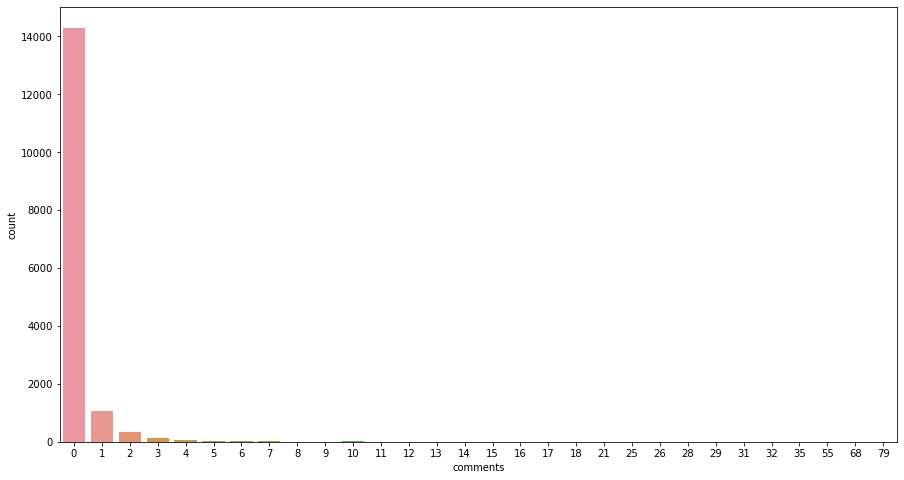

In [527]:
plt.subplots(figsize=(15,8))
sns.countplot(x=df_artist.comments)

In [293]:
#before dropping
df_artist_backup.loc[df_artist_backup.comments == -1]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
10778,NaT,NaT,NaN,NaN,-1,NaT,-1,5720,NaN,NaN,NaN,NaN,Ergo Phizmiz & Margita Zalite,NaN,[],NaN,NaN
12070,NaT,NaT,NaN,NaN,-1,NaT,-1,2891,NaN,NaN,NaN,NaN,The Ladybirds,NaN,[],http://www.youtube.com/experimentalsoap,NaN
15386,NaT,NaT,NaN,NaN,-1,NaT,-1,4239,NaN,NaN,NaN,NaN,Thiaz Itch,NaN,[],http://www.thiazitch.com,NaN
16576,NaT,NaT,NaN,NaN,-1,NaT,-1,4598,NaN,NaN,NaN,NaN,8GB,NaN,[],http://kikencorp.com/8gb/,NaN
22978,NaT,NaT,NaN,NaN,-1,NaT,-1,5870,NaN,NaN,NaN,NaN,Nals Goring,NaN,[],http://osr-tapes.blogspot.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146059,NaT,NaT,NaN,NaN,-1,NaT,-1,23254,NaN,NaN,NaN,NaN,Nick R 61/Stasis Device,NaN,[],NaN,NaN
148172,NaT,NaT,NaN,NaN,-1,NaT,-1,23541,NaN,NaN,NaN,NaN,Bounar & the bounettes,NaN,[],NaN,NaN
148175,NaT,NaT,NaN,NaN,-1,NaT,-1,23542,NaN,NaN,NaN,NaN,Bounar,NaN,[],NaN,NaN


In [290]:
#CODE
df_artist.drop(df_artist.loc[df_artist.comments==-1].index, inplace=True)
df.drop(df.loc[df.artist.comments==-1].index, inplace=True)

In [291]:
#after dropping
df_artist.loc[df_artist.comments == -1]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,


In [287]:
df.loc[df.artist.comments==68]

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
37899           3 2010-10-25 16:09:32    2010-09-01      NaN        23   7603   
37900           3 2010-10-25 16:09:32    2010-09-01      NaN        23   7603   
37901           3 2010-10-25 16:09:32    2010-09-01      NaN        23   7603   
37902           3 2010-10-25 16:09:32    2010-09-01      NaN        23   7603   
37903           3 2010-10-25 16:09:32    2010-09-01      NaN        23   7603   
...           ...                 ...           ...      ...       ...    ...   
107351          6 2014-06-22 01:39:16           NaT      NaN        47  16642   
107352          6 2014-06-22 01:39:16           NaT      NaN        47  16642   
107353          6 2014-06-22 01:39:16           NaT      NaN        47  16642   
107354          6 2014-06-22 01:39:16           NaT      NaN        47  16642   
147686          1 2016-12-13 12:50:55    2016-12-12      NaN         3  22008   

                                                                     \
                                                information listens   
track_id                                                              
37899     <p>\n</p><p>from <a title="http://brokeforfree...  520138   
37900     <p>\n</p><p>from <a title="http://brokeforfree...  520138   
37901     <p>\n</p><p>from <a title="http://brokeforfree...  520138   
37902     <p>\n</p><p>from <a title="http://brokeforfree...  520138   
37903     <p>\n</p><p>from <a title="http://brokeforfree...  520138   
...                                                     ...     ...   
107351                                                  NaN  297860   
107352                                                  NaN  297860   
107353                                                  NaN  297860   
107354                                                  NaN  297860   
147686                                                  NaN   18712   

                                        \
            producer              tags   
track_id                                 
37899            NaN  [tracks to sync]   
37900            NaN  [tracks to sync]   
37901            NaN  [tracks to sync]   
37902            NaN  [tracks to sync]   
37903            NaN  [tracks to sync]   
...              ...               ...   
107351           NaN                []   
107352           NaN                []   
107353           NaN                []   
107354           NaN                []   
147686    FrostClick                []   

                                                                           \
                                              title tracks           type   
track_id                                                                    
37899                                     Slam Funk     12          Album   
37900                                     Slam Funk     12          Album   
37901                                     Slam Funk     12          Album   
37902                                     Slam Funk     12          Album   
37903                                     Slam Funk     12          Album   
...                                             ...    ...            ...   
107351                                        Petal     14            NaN   
107352                                        Petal     14            NaN   
107353                                        Petal     14            NaN   
107354                                        Petal     14            NaN   
147686    FrostWire Creative Commons Mixtape Vol. 5     58  Single Tracks   

                    artist                                    \
         active_year_begin active_year_end associated_labels   
track_id                                                       
37899           2009-0

<AxesSubplot:xlabel='date_created', ylabel='Density'>

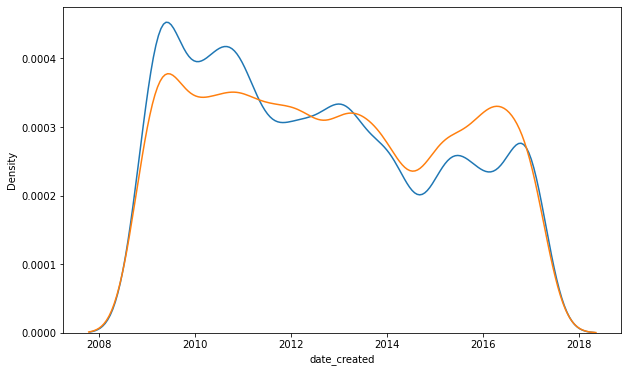

In [295]:
sns.kdeplot(df_artist.date_created)
sns.kdeplot(df_album.date_created)

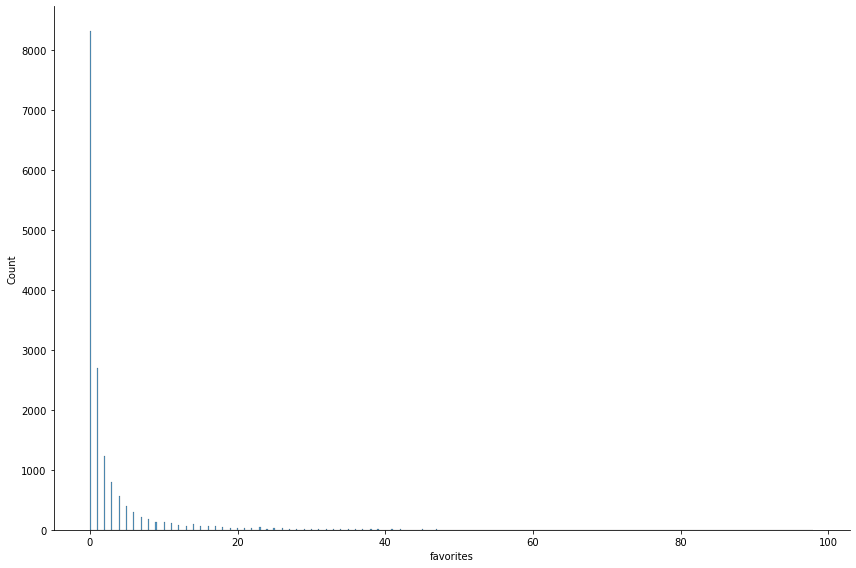

In [308]:
sns.displot(df_artist.favorites.loc[df_artist.favorites < 100], height = 8, aspect =  1.5)

In [313]:
df_artist.favorites.value_counts()/len(df_artist)

0      0.516171
1      0.167546
2      0.076169
3      0.049662
4      0.035508
         ...   
234    0.000062
178    0.000062
162    0.000062
74     0.000062
951    0.000062
Name: favorites, Length: 127, dtype: float64

In [311]:
df_artist.loc[df_artist.favorites == 963]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
37899,2009-01-01,NaT,NaN,"<p>I love making music.</p>\n<p><a title=""Face...",68,2010-10-25 16:11:06,963,9067,36.974117,"Santa Cruz, CA",-122.030796,Tom Cascino,Broke For Free,NaN,"[video, broke for free]",http://brokeforfree.com/,NaN


<AxesSubplot:xlabel='favorites', ylabel='Density'>

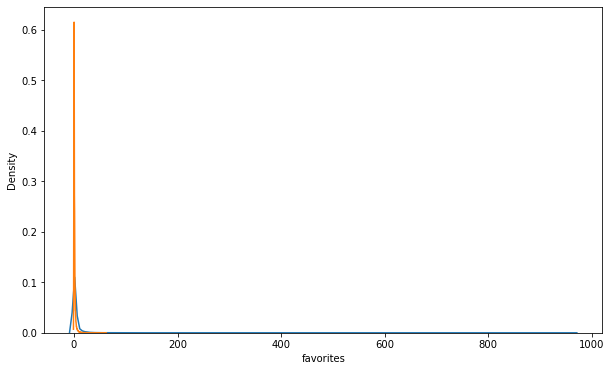

In [299]:
sns.kdeplot(df_artist.favorites)
sns.kdeplot(df_album.favorites)

In [318]:
df_artist.latitude.isna().sum()/len(df_artist)

0.7618722453286982

In [317]:
df_artist.location.isna().sum()/len(df_artist)

0.6254888571605934

In [314]:
#most of the times where location is nan also lat & lon are nans
df_artist.loc[pd.isna(df_artist.location)]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
135,NaT,NaT,NaN,NaN,1,2008-11-26 01:47:07,0,52,NaN,NaN,NaN,NaN,Abominog,NaN,[abominog],http://myspace.com/abominog,NaN
181,1996-01-01,NaT,"Ballbearings Pinatas, Vinyl International, <a ...","<p>Ariel ""Pink"" Rosenberg has been churning ou...",10,2008-11-26 01:49:59,76,64,NaN,NaN,NaN,"Ariel ""Pink"" Rosenberg on vocals\nKenny Gilmor...",Ariel Pink's Haunted Graffiti,John Maus,[ariel pinks haunted graffiti],http://www.ariel-pink.com/,http://en.wikipedia.org/wiki/Ariel_Pink
246,NaT,NaT,NaN,<p>Brattleboro VT via Athens GA via Chicago IL...,7,2008-11-26 01:53:25,27,80,NaN,NaN,NaN,NaN,Bird Names,NaN,"[athens ga, bird names, athens, vermont, chica...",http://northern-spy.com/artists/bird-names/,NaN
384,NaT,NaT,NaN,NaN,2,2008-11-26 01:58:29,11,86,NaN,NaN,NaN,NaN,Blanketship,NaN,[blanketship],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155234,NaT,NaT,NaN,NaN,0,2017-03-28 12:17:41,0,24351,NaN,NaN,NaN,NaN,jazznoise,NaN,[jazznoise],NaN,NaN
155288,NaT,NaT,NaN,NaN,0,2017-03-30 09:46:04,0,24355,NaN,NaN,NaN,NaN,Earl Howard,NaN,[earl howard],http://earlhow.com/,NaN
155291,NaT,NaT,NaN,NaN,0,2017-03-30 09:25:54,0,24352,NaN,NaN,NaN,NaN,Alex Mason/The Minor Emotion,NaN,[alex masonthe minor emotion],NaN,NaN


In [320]:
#only 10 artists where we could impute his location from latitude and longitude
df_artist.loc[(pd.isna(df_artist.location)) & (pd.notna(df_artist.latitude))]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
1759,2004-01-01,NaT,NaN,NaN,12,2008-11-26 03:09:21,105,291,39.271398,NaN,-76.560383,NaN,The Agrarians,NaN,[the agrarians],http://enjoplinrealetime.blogspot.com/,NaN
22297,NaT,NaT,NaN,<p>jan grünfeld is a singer with an acoustic g...,0,2009-12-16 16:53:51,9,5881,50.769107,NaN,11.542965,NaN,Jan Grünfeld,NaN,[jan grnfeld],http://gruenfeldmusic.com/,NaN
38808,2001-01-01,NaT,NaN,<p>Uton is the one-man project of <strong>Jani...,0,2010-11-06 09:41:01,17,9264,48.081015,NaN,-3.078185,Jani Hirvonen,Uton,NaN,"[uton, finland, experimental, psychedelic, dro...",http://utonspace.blogspot.fr/,NaN
48949,NaT,NaT,NaN,NaN,0,2011-02-13 15:43:11,51,10145,35.670479,NaN,139.740921,NaN,Various Artists,NaN,[],NaN,NaN
65393,NaT,NaT,NaN,<p>http://epv-artists.tumblr.com/post/59677262...,1,2012-05-25 01:48:12,10,13625,33.575409,NaN,131.259262,NaN,-ono-,NaN,[elementperspective],http://ono-life-cycle.tumblr.com,NaN
70067,NaT,NaT,NaN,NaN,0,2012-09-17 11:26:39,0,14356,45.176384,NaN,-123.045601,NaN,ioflow,NaN,[ioflow],NaN,NaN
79807,NaT,NaT,NaN,"<p>Support on <a title=""FACEBOOK"" href=""https:...",18,2013-01-17 13:09:11,20,15412,29.760450,NaN,-95.369782,NaN,"Ak'chamel, The Giver of Illness",NaN,"[akchamel, lo-fi]",https://akchamel.bandcamp.com/,NaN
80379,NaT,NaT,NaN,NaN,0,2013-03-14 19:39:14,2,15809,38.241456,NaN,-76.430114,NaN,The Undynamic Pop Experiment,Cincinnati Elite\nVincenzo,"[the undynamic pop experiment, world carnival,...",NaN,NaN
85950,NaT,NaT,NaN,"<p><span style=""color:#222222;font-family:aria...",0,2008-12-04 09:23:41,0,1123,40.714353,NaN,-74.005973,Pete Galub,Pete Galub,www.petegalub.com\n,"[surf guitar, jewish, rockabilly, instrumental...",www.petegalub.com,NaN


In [324]:
df_artist.members.isna().sum()/len(df_artist)

0.7474082810851077

In [340]:
df_artist.members.describe()

count           4069
unique          4015
top       Jan Strach
freq               7
Name: members, dtype: object

In [326]:
df_artist.loc[pd.isna(df_artist.members)]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
135,NaT,NaT,NaN,NaN,1,2008-11-26 01:47:07,0,52,NaN,NaN,NaN,NaN,Abominog,NaN,[abominog],http://myspace.com/abominog,NaN
139,1999-01-01,NaT,NaN,<p>The Eyesores originally formed in 1997 orig...,0,2008-11-26 01:47:44,11,54,41.823989,"Providence, RI",-71.412834,NaN,Alec K. Redfearn & the Eyesores,"Haldols, Amoebic Ensemble, Mr. Gutter",[alec k redfearn and the eyesores],http://www.aleckredfearn.com,http://en.wikipedia.org/wiki/Alec_K_Redfearn
149,NaT,NaT,NaN,"<p><span style=""font-family:Arial, Helvetica, ...",0,2008-11-26 01:48:10,1,58,39.290385,"Baltimore, MD",-76.612189,NaN,Andy Hayleck,NaN,[andy hayleck],http://www.ehserecords.com/ehse006.html,NaN
188,1968-01-01,NaT,"ESP-Disk, Spinning Gold",<p><i><span></span></i>Ed Askew cut one of the...,1,2008-11-26 02:08:52,7,127,40.714353,"New York, NY",-74.005973,NaN,Ed Askew,NaN,[ed askew],http://www.facebook.com/ecaskew?v=feed,NaN
226,NaT,NaT,NaN,NaN,0,2008-11-26 01:52:07,0,68,39.952335,"Philadelphia, PA",-75.163789,NaN,Bad News Bats,NaN,"[philly, bad news bats]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155234,NaT,NaT,NaN,NaN,0,2017-03-28 12:17:41,0,24351,NaN,NaN,NaN,NaN,jazznoise,NaN,[jazznoise],NaN,NaN
155288,NaT,NaT,NaN,NaN,0,2017-03-30 09:46:04,0,24355,NaN,NaN,NaN,NaN,Earl Howard,NaN,[earl howard],http://earlhow.com/,NaN
155291,NaT,NaT,NaN,NaN,0,2017-03-30 09:25:54,0,24352,NaN,NaN,NaN,NaN,Alex Mason/The Minor Emotion,NaN,[alex masonthe minor emotion],NaN,NaN


In [342]:
df_artist.name.describe()

count           16109
unique          16074
top       Mister Drey
freq                2
Name: name, dtype: object

In [385]:
df_artist.name.value_counts()

Mister Drey               2
GX Jupitter-Larsen        2
Thomas Dimuzio            2
Chris Forsyth             2
The Zombie Dandies        2
                         ..
Vadim Lankov              1
Frank Bango               1
Beast, Please Be Still    1
Inicolabug & XZICD        1
Edessa                    1
Name: name, Length: 16074, dtype: int64

In [383]:
df_artist.name.value_counts().index[df_artist.name.value_counts()>1]

Index(['Mister Drey', 'GX Jupitter-Larsen', 'Thomas Dimuzio', 'Chris Forsyth',
       'The Zombie Dandies', 'Mini Roc', 'Tiruset', 'Nascitari',
       'Scattered Order', 'Razen', 'Wayne Mason', 'The Holy Innocents',
       'Lushlife', 'Gentleman Jesse', 'Kingstux', 'Unknown Artist', 'K/W/A/Y',
       'Small Radio', 'Skin O. Daayba', 'The Wilful Boys', 'Painburn',
       'A.n.K.h //', 'Arthur Collins and Byron G. Harlan', 'T3r4t0m4',
       'Avaren', 'Exomène', 'Désir Decir', 'Анатолий Никулин', 'Jeva',
       'Chronox', 'Ventolyn & Becotyde', 'Mastermind XS', 'Digi G'Alessio',
       'Wayne Kinos', 'In De Nadfin'],
      dtype='object')

In [384]:
df_artist.loc[df_artist.name.isin(df_artist.name.value_counts().index[df_artist.name.value_counts()>1])]

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2071,NaT,NaT,NaN,<p>Electronic/noise musician Thomas Dimuzio ha...,0,2008-11-26 02:08:48,3,115,NaN,NaN,NaN,NaN,Thomas Dimuzio,NaN,"[bay area, thomas dimuzio]",http://www.thomasdimuzio.com/,NaN
5031,NaT,NaT,NaN,NaN,0,2009-01-09 15:03:22,0,1680,NaN,NaN,NaN,NaN,Arthur Collins and Byron G. Harlan,NaN,[arthur collins and byron g harlan],NaN,NaN
5986,NaT,NaT,NaN,<p> We started a band and play music for human...,0,2009-02-12 07:47:48,0,1806,33.748995,"Atlanta, GA",-84.387982,Gentleman Jesse & His Men\nJessie Smith - lead...,Gentleman Jesse,NaN,[gentleman jesse],http://www.myspace.com/gentlemanjesse,NaN
9681,NaT,NaT,NaN,NaN,0,2009-04-03 00:15:43,0,2282,NaN,NaN,NaN,NaN,Skin O. Daayba,NaN,[skin o daayba],NaN,NaN
9682,1996-01-01,1999-01-01,NaN,NaN,0,2009-04-02 23:22:33,0,2280,31.046051,Israel,34.851612,"Ohad fishof, Uri Katzenstein",Skin O. Daayba,NaN,[skin o daayba],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148424,NaT,NaT,NaN,NaN,0,2016-12-28 10:40:44,0,23583,NaN,NaN,NaN,NaN,T3r4t0m4,NaN,[t3r4t0m4],NaN,NaN
148429,NaT,NaT,NaN,NaN,0,2016-12-28 10:41:51,0,23585,NaN,NaN,NaN,NaN,In De Nadfin,NaN,[indenadfin],NaN,NaN
149068,NaT,NaT,NaN,NaN,0,2017-01-07 19:47:28,0,23651,NaN,NaN,NaN,NaN,The Wilful Boys,NaN,[the wilful boys],NaN,NaN


In [329]:
df_artist.tags.describe()

count     16109
unique    15660
top          []
freq        329
Name: tags, dtype: object

In [392]:
df_artist.tags

track_id
2                                                    [awol]
10                                      [philly, kurt vile]
20        [instrumentals, experimental pop, post punk, e...
135                                              [abominog]
137                                                [airway]
                                ...                        
155291                        [alex masonthe minor emotion]
155293                             [alex masonartem gribov]
155297                       [alex masonblacksunaeon music]
155307                                              [awott]
155314                                            [spowder]
Name: tags, Length: 16109, dtype: object

In [330]:
df_artist.tags.astype('str').value_counts()

[]                                          329
['columbus']                                 33
['new zealand']                               7
['pk jazz collective']                        4
['elementperspective', 'drone', 'noise']      2
                                           ... 
['the icarus descent']                        1
['fibreman']                                  1
['mars-96']                                   1
['female vocalist', 'deekie']                 1
['berthelot']                                 1
Name: tags, Length: 15660, dtype: int64

In [334]:
df_artist.tags.astype('str').unique()[:10]

array(["['awol']", "['philly', 'kurt vile']",
       "['instrumentals', 'experimental pop', 'post punk', 'experimental rock', 'soundtracks', 'lo fi', 'nicky', 'impro', 'cook', 'nicky andrews', 'ukelele', 'nicky cook', 'singer songwriter', 'tabla']",
       "['abominog']", "['airway']",
       "['alec k redfearn and the eyesores']",
       "['providence', 'amoebic ensemble', 'rhode island']",
       "['contradiction']", "['andy hayleck']", "['animal writes']"],
      dtype=object)

In [335]:
to_1D(df_artist.tags).value_counts()

experimental           195
electronic             140
noise                  101
drone                   63
surrism-phonoethics     58
                      ... 
moon bounce              1
kurt liedwart            1
michele del zotto        1
thrash metal             1
loachfillet              1
Length: 17764, dtype: int64

In [396]:
'AWOL' in df_artist.name.to_list()

True

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [397]:
to_1D(df_artist.tags)

0                                awol
1                              philly
2                           kurt vile
3                       instrumentals
4                    experimental pop
                     ...             
22370     alex masonthe minor emotion
22371          alex masonartem gribov
22372    alex masonblacksunaeon music
22373                           awott
22374                         spowder
Length: 22375, dtype: object

In [401]:
[x for x in df_artist.tags][:10]

[['awol'],
 ['philly', 'kurt vile'],
 ['instrumentals',
  'experimental pop',
  'post punk',
  'experimental rock',
  'soundtracks',
  'lo fi',
  'nicky',
  'impro',
  'cook',
  'nicky andrews',
  'ukelele',
  'nicky cook',
  'singer songwriter',
  'tabla'],
 ['abominog'],
 ['airway'],
 ['alec k redfearn and the eyesores'],
 ['providence', 'amoebic ensemble', 'rhode island'],
 ['contradiction'],
 ['andy hayleck'],
 ['animal writes']]

In [402]:
df_artist.website.isna().sum()/len(df_artist)

0.5707368551741263

In [404]:
df_artist.wikipedia_page.isna().sum()/len(df_artist)

0.9756657768949035

#### tracks.track

In [49]:
df_track = df.track.copy()

<AxesSubplot:>

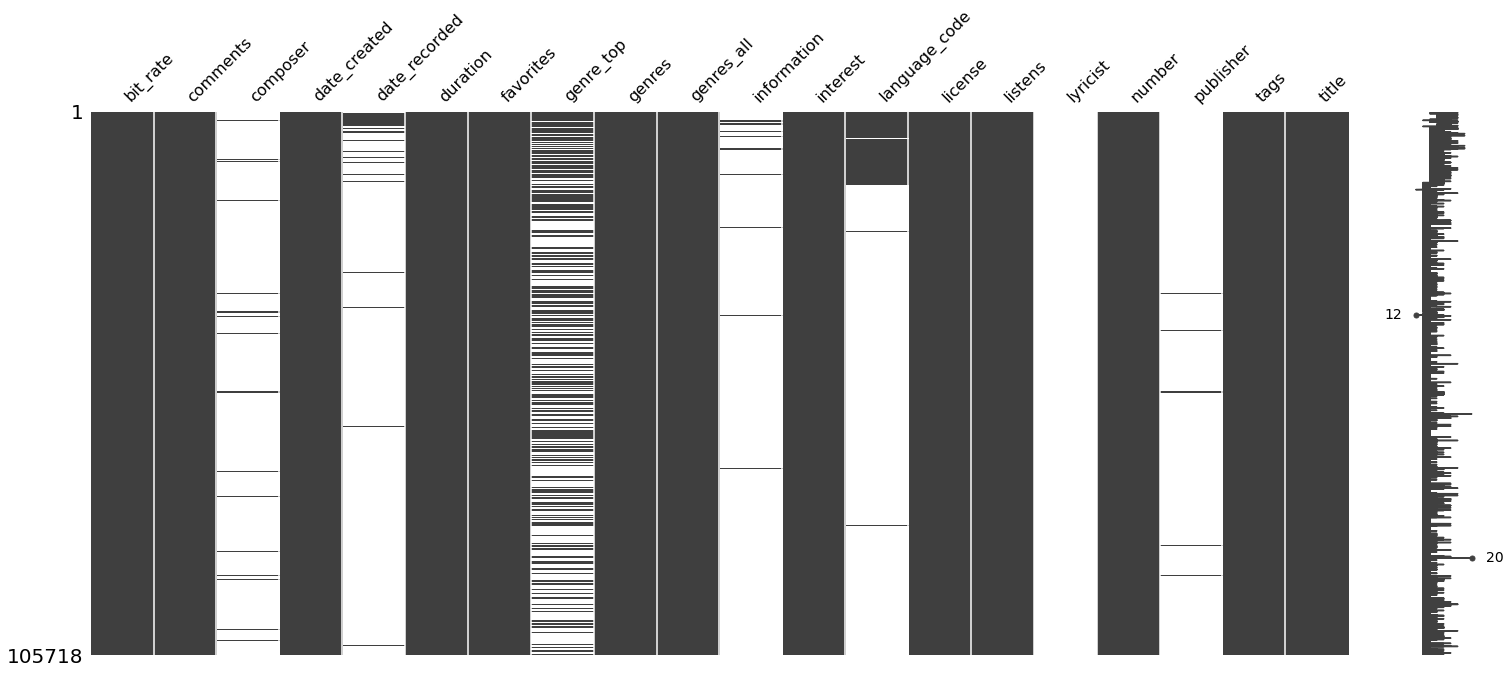

In [406]:
msno.matrix(df_track)

In [432]:
df_track.describe(datetime_is_numeric=True, include='all')

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
count,105718.000000,105718.000000,3656,105718,6158,105718.000000,105718.000000,49383,105718,105718,2347,1.057180e+05,15006,105631,105718.000000,311,105718.000000,1253,105718,105717
unique,NaN,NaN,502,NaN,NaN,NaN,NaN,16,4745,4130,1585,NaN,44,113,NaN,66,NaN,135,2427,94267
top,NaN,NaN,konstantin trokai,NaN,NaN,NaN,NaN,Rock,[21],[21],"<p><a href=""http://www.myspace.com/theshambler...",NaN,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,NaN,Apache Tomcat,NaN,Victrola Dog (ASCAP),[],Untitled
freq,NaN,NaN,540,NaN,NaN,NaN,NaN,14141,2704,2704,22,NaN,14237,18878,NaN,44,NaN,465,82380,298
mean,263.358986,0.031792,NaN,2013-02-14 08:51:09.705200384,2003-06-05 01:04:32.426119424,277.549575,3.190573,NaN,NaN,NaN,NaN,3.544579e+03,NaN,NaN,2331.815878,NaN,8.274088,NaN,NaN,NaN
min,-0.001000,0.000000,NaN,2008-11-25 17:49:06,1896-01-01 00:00:00,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,192.000000,0.000000,NaN,2010-12-13 16:59:47.249999872,2005-03-09 00:00:00,149.000000,0.000000,NaN,NaN,NaN,NaN,5.980000e+02,NaN,NaN,291.000000,NaN,2.000000,NaN,NaN,NaN
50%,298.605000,0.000000,NaN,2013-02-14 18:56:07,2008-06-26 00:00:00,216.000000,1.000000,NaN,NaN,NaN,NaN,1.310000e+03,NaN,NaN,761.000000,NaN,5.000000,NaN,NaN,NaN
75%,320.000000,0.000000,NaN,2015-05-12 11:22:41.750000128,2009-02-07 06:00:00,305.000000,3.000000,NaN,NaN,NaN,NaN,3.057000e+03,NaN,NaN,2015.000000,NaN,9.000000,NaN,NaN,NaN
max,448.000000,37.000000,NaN,2017-03-30 15:23:39,2017-03-14 00:00:00,18350.000000,1482.000000,NaN,NaN,NaN,NaN,3.293557e+06,NaN,NaN,543252.000000,NaN,255.000000,NaN,NaN,NaN


##### var: track.bit_rate
empty: 0%

analysis: indicate bit rate per second (amount of data used to encode one second of audio). Standard measure is the kilobyte per second (kbps), this is why we divided the bit rate by 1000 to make more legible. Standard MP3 format usually range from around 96 to 320Kbps and usually take standardized values such as 320, 256 and 128 kbps. We an see that on the variable distribution as most values are on those values and more than 80 % of all tracks have a standard kbps size (320, 256, 192 and 128).
The var has inconsistent values (-0.01 kbps), which are simply placeholders for tracks that do have bit rate information and we therefore considered them empty. Another anomaly was found for a track with 0.192 kbps, which was due to an input error on the FMA website. Such song actually has a 192 kbps and we thus updated its value. 
We were then left with a variable with a large distribution with values ranging from 8 kbps (a low quality Inca traditional song) to very high quality 448 kbps for only 2 tracks. 

decision: 
- leave as numeric for outlier detection
- or convert to categorical ordinal "very low", "low", "medium", "high"

In [59]:
df_track.bit_rate = df_track.bit_rate*1000
df_track.bit_rate

track_id
2         256.0
3         256.0
5         256.0
10        192.0
20        256.0
          ...  
155316    320.0
155317    320.0
155318    320.0
155319    320.0
155320    320.0
Name: bit_rate, Length: 106574, dtype: float64

In [42]:
df_track.bit_rate = df_track.bit_rate/1000
df.loc[df.track.bit_rate < 0, ('track', 'bit_rate')] = 320

In [43]:
df.loc[df.track.bit_rate.isna(), ('track', 'bit_rate')] = 

SyntaxError: invalid syntax (<ipython-input-43-e5efea04f855>, line 1)

In [44]:
df_track.bit_rate.value_counts().iloc[:4].sum()/df_track.bit_rate.value_counts().sum()

0.8268808527408186

Text(0.5, 1.0, 'Tracks bit rate distribution')

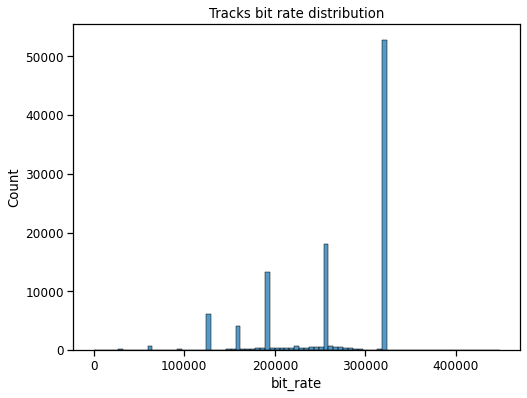

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df_track.bit_rate)
ax.set_title('Tracks bit rate distribution')

Text(0.5, 1.0, 'Distribution of tracks bit rate')

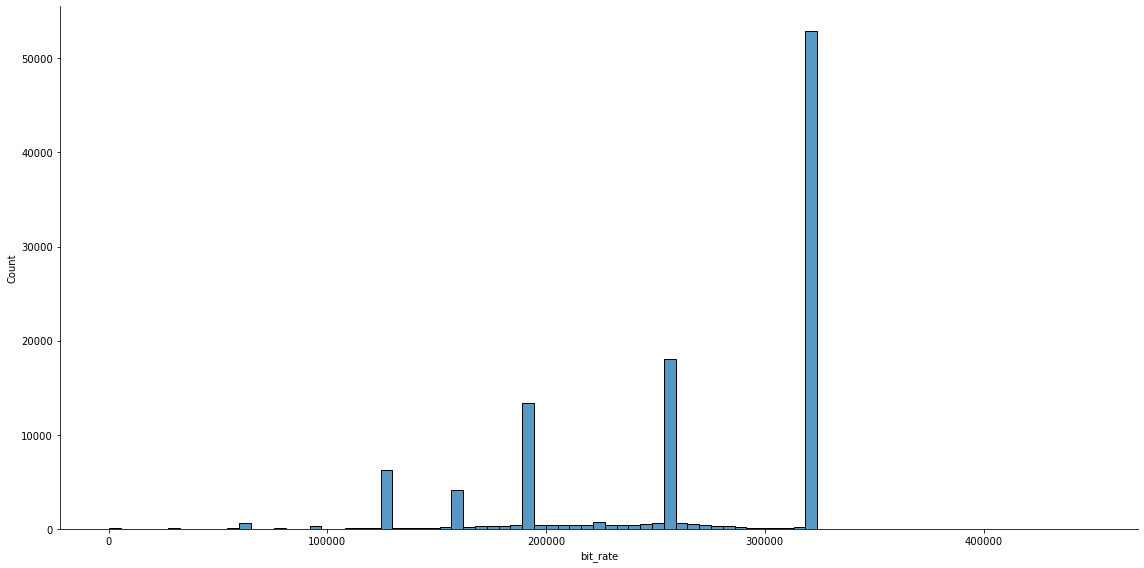

In [49]:

sns.displot(df.track.bit_rate,height = 8,  aspect = 2)
ax.set_title('Distribution of tracks bit rate')

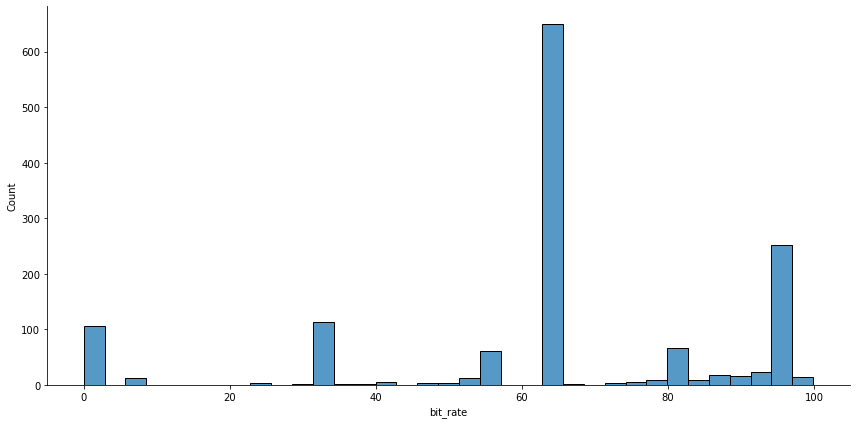

In [425]:
sns.displot(df_track.bit_rate.loc[df_track.bit_rate < 100] ,height = 6,  aspect = 2)

In [427]:
df_track.bit_rate.loc[df_track.bit_rate < 60].value_counts()

 32.000    112
-0.001     105
 56.000     60
 8.000      13
 40.000      6
 24.000      3
 48.000      3
 51.351      1
 51.580      1
 52.615      1
 53.168      1
 52.156      1
 52.184      1
 34.441      1
 52.917      1
 52.418      1
 52.397      1
 50.830      1
 31.281      1
 31.742      1
 0.192       1
 52.300      1
 54.678      1
 51.531      1
 37.617      1
 52.201      1
 52.754      1
 49.811      1
Name: bit_rate, dtype: int64

In [914]:
df.loc[df.track.bit_rate == 0.000192, ('track','bit_rate')] = 0.192

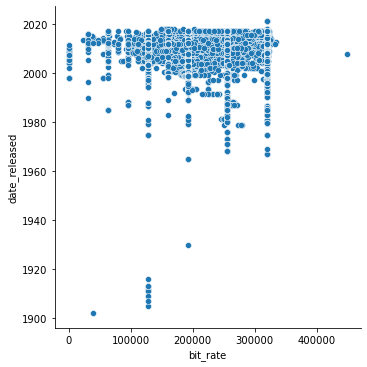

In [445]:
sns.relplot(x = df.track.bit_rate, y = df.album.date_released)

<AxesSubplot:xlabel='comments', ylabel='count'>

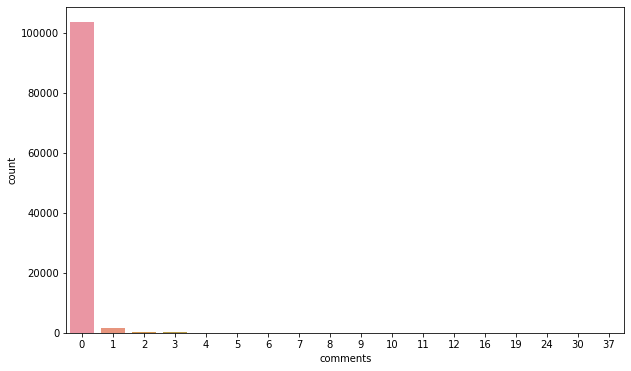

In [449]:
sns.countplot(x = df_track.comments)

In [450]:
df_track.comments.value_counts()

0     103573
1       1504
2        414
3        132
4         40
5         19
6         10
7          5
8          5
9          4
10         3
12         2
16         2
30         1
11         1
19         1
24         1
37         1
Name: comments, dtype: int64

In [453]:
df_track.comments.value_counts()/df_track.comments.value_counts().sum()

0     0.979710
1     0.014227
2     0.003916
3     0.001249
4     0.000378
5     0.000180
6     0.000095
7     0.000047
8     0.000047
9     0.000038
10    0.000028
12    0.000019
16    0.000019
30    0.000009
11    0.000009
19    0.000009
24    0.000009
37    0.000009
Name: comments, dtype: float64

In [454]:
df_track.composer.isna().sum()/len(df_track)

0.9654174312794416

In [458]:
df.loc[df.track.composer.isna()]

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4      1   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
26              0 2008-11-26 01:45:05    2009-01-06      NaN         2      4   
...           ...                 ...           ...      ...       ...    ...   
155316          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155317          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155318          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155319          0 2017-03-30 15:20:35    2017-02-17      NaN         0  22940   
155320          0 2017-03-26 16:22:18    2017-03-26      NaN         1  22906   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
3                                                   <p></p>    6073   
5                                                   <p></p>    6073   
20                <p> "spiritual songs" from Nicky Cook</p>    2710   
26                <p> "spiritual songs" from Nicky Cook</p>    2710   
...                                                     ...     ...   
155316    <p>A live performance at Monty Hall on Feb 17,...    1506   
155317    <p>A live performance at Monty Hall on Feb 17,...    1506   
155318    <p>A live performance at Monty Hall on Feb 17,...    1506   
155319    <p>A live performance at Monty Hall on Feb 17,...    1506   
155320                                                  NaN    7481   

                                                                          \
             producer                                               tags   
track_id                                                                   
2                 NaN                                                 []   
3                 NaN                                                 []   
5                 NaN                                                 []   
20                NaN                                                 []   
26                NaN                                                 []   
...               ...                                                ...   
155316    Monty Hall                                                  []   
155317    Monty Hall                                                  []   
155318    Monty Hall                                                  []   
155319    Monty Hall                                                  []   
155320            NaN  [ballad, epic, rockabilly, curse, hex, hard ro...   

                                                                  \
                                  title tracks              type   
track_id                                                           
2                  AWOL - A Way Of Life      7             Album   
3                  AWOL - A Way Of Life      7             Album   
5                  AWOL - A Way Of Life      7             Album   
20                                Niris     13             Album   
26                                Niris     13             Album   
...                                 ...    ...               ...   
155316    Live at Monty Hall, 2/17/2017      6  Live Performance   
155317    Live at Monty Hall, 2/17/2017      6  Live Performance   
155318    Live at Monty Hall, 2/17/2017      6  Live Performance   
1

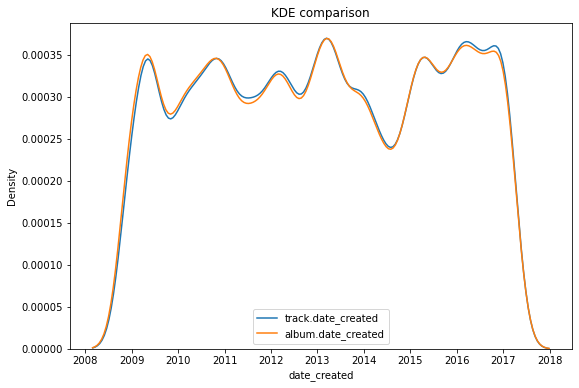

In [763]:
fig, ax =  plt.subplots(figsize = (9,6))
sns.kdeplot(df.track.date_created)
sns.kdeplot(df.album.date_created)
ax.set_title('KDE comparison')
ax.legend(['track.date_created','album.date_created'])

##### var: track.date_recorded
empty: 94%

analysis: distribution fairly similar to album.date_realease. Excessive number of missing values  (94 %). It should be noted that on the FMA website, the primary date shown on a song's page is the track's upload (creation) date and not track's recording date.

decision: 
- use it to fill album.date_released when possible (~ 1600 rows)
- drop it

ConversionError: Failed to convert value(s) to axis units: track_id
2         2008-11-26 00:00:00
3         2008-11-26 00:00:00
5         2008-11-26 00:00:00
10        2008-11-26 00:00:00
20        2008-01-01 00:00:00
                 ...         
155316                    NaT
155317                    NaT
155318                    NaT
155319                    NaT
155320                    NaT
Name: x, Length: 105718, dtype: object

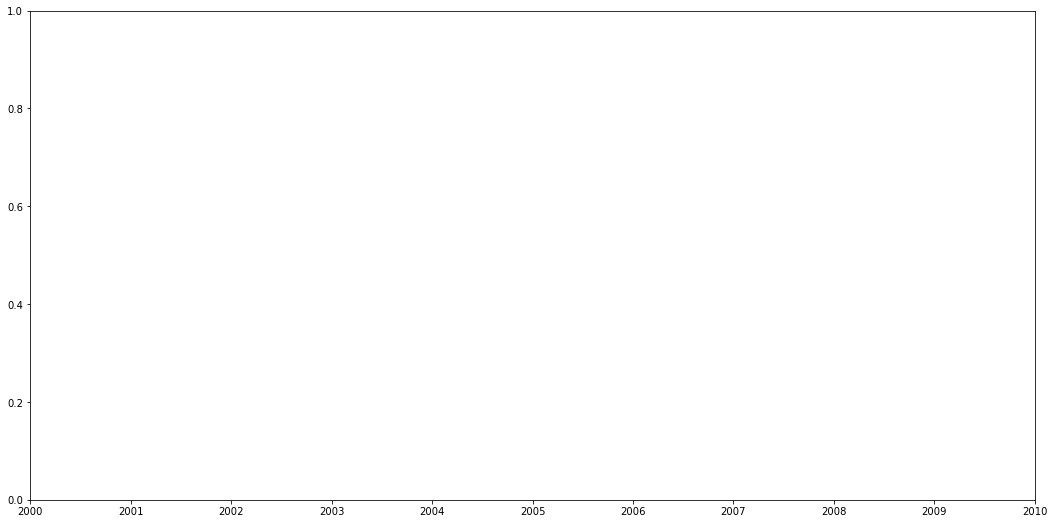

In [765]:
sns.kdeplot(df.track.date_recorded)
sns.kdeplot(df.album.date_released)
plt.legend(['date_recorded','date_released'])
plt.suptitle('KDE', size = 16, y = 0.95)

In [482]:
df_track.date_recorded.isna().sum()/len(df_track)

0.9417506952458428

In [821]:
df.loc[(df.track.date_recorded.notna()) & (df.album.date_released.isna())]

Empty DataFrame
Columns: [(album, comments), (album, date_created), (album, date_released), (album, engineer), (album, favorites), (album, id), (album, information), (album, listens), (album, producer), (album, tags), (album, title), (album, tracks), (album, type), (artist, active_year_begin), (artist, active_year_end), (artist, associated_labels), (artist, bio), (artist, comments), (artist, date_created), (artist, favorites), (artist, id), (artist, latitude), (artist, location), (artist, longitude), (artist, members), (artist, name), (artist, related_projects), (artist, tags), (artist, website), (artist, wikipedia_page), (set, split), (set, subset), (track, bit_rate), (track, comments), (track, composer), (track, date_created), (track, date_recorded), (track, duration), (track, favorites), (track, genre_top), (track, genres), (track, genres_all), (track, information), (track, interest), (track, language_code), (track, license), (track, listens), (track, lyricist), (track, number), (track, publisher), (track, tags), (track, title)]
Index: []

In [820]:
df.loc[(df.track.date_recorded.notna()) & (df.album.date_released.isna()), ('album','date_released')] = df.loc[(df.track.date_recorded.notna()) & (df.album.date_released.isna()), ('track','date_recorded')]

##### var: track.duration
empty: 0%

analysis: track duration in seconds. The distribution is centered around 200 seconds but it has a very long right tail that goes up until 5 digits figure. The highest value(18'350 seconds) was actually an error and was adjusted. The next highest outliers (~ 11'000) have been verified and are indeed tracks that last around 3-4 hours. On the other side, very few songs (0.01%) also appeared to have a lenght of 0 seconds. While most of those were actually of average lenght, one song ("Tiny penis") was actually of very short lenght and was displayed as a 0" track on the FMA dataset (we adjsuted it's duration to 1 second).

decision:
- adjust highest outlier with its actual duration or leave as it is for outlier detection
- all duration of 0" have been replaced with average duration of 216 seconds (except for "tiny penis" which was adjusted to 1 second)

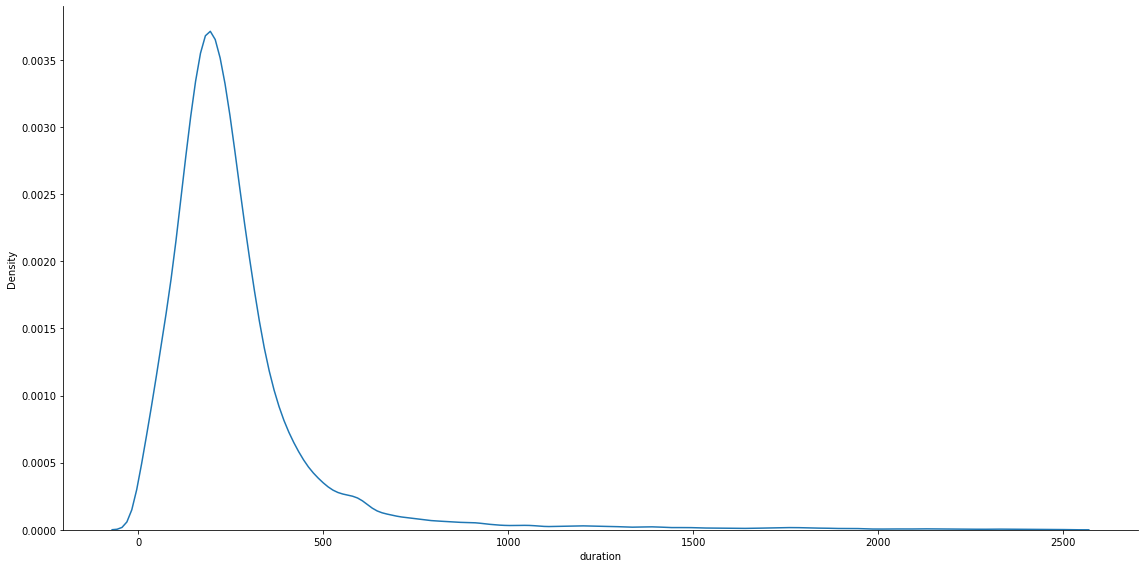

In [62]:
sns.displot(df_track.duration.loc[df_track.duration<2500],height= 8,aspect = 2, kind='kde')

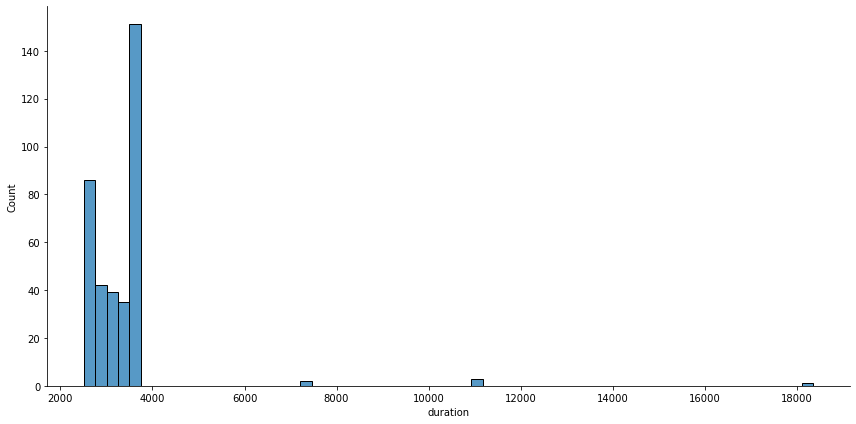

In [499]:
sns.displot(df_track.duration.loc[df_track.duration>2500], height= 6,aspect = 2) 

In [495]:
df_track.duration.loc[df_track.duration>2500].sort_values(ascending=False)

track_id
2624      18350
122567    11030
112880    11016
108001    10999
112068     7372
          ...  
3540       2511
19856      2511
86169      2510
66710      2510
109375     2509
Name: duration, Length: 359, dtype: int64

In [503]:
df_track.loc[df_track.duration>4000]

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2624,256.000,0,NaN,2008-12-04 09:26:23,2008-09-20,18350,7,NaN,"[15, 38, 42, 47]","[42, 47, 38, 15]",NaN,1907,NaN,NaN,1467,NaN,1,NaN,[],Harmonia Live at ATP 08 part 1
108001,206.437,0,Andy Ortmann,2014-08-04 07:23:49,NaT,10999,1,NaN,[],[],"<p>The Nanking Massacre or Nanjing Massacre, a...",4270,NaN,Attribution-Share Alike 3.0 United States,1915,NaN,3,Radius,"[radius, radio art]",RAPE OF NANKING
112068,320.000,0,NaN,2014-12-14 03:37:55,NaT,7372,1,NaN,"[18, 38, 103]","[38, 103, 17, 18, 1235]",NaN,5392,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,4374,NaN,1,NaN,[],Orrrrgaaanooone
112880,192.000,1,NaN,2015-01-01 04:29:37,2015-01-01,11016,41,NaN,"[42, 107, 1235]","[42, 107, 1235, 15]",NaN,38502,NaN,Attribution,32665,NaN,0,NaN,[],Adam Are You Free?
122567,192.000,0,NaN,2015-07-14 15:54:27,NaT,11030,3,Instrumental,"[267, 1235]","[267, 1235]",NaN,4680,NaN,Attribution,3535,NaN,9,NaN,[relaxing],In the Garden
127430,192.000,0,NaN,2015-11-07 22:42:09,NaT,7320,7,NaN,"[42, 107]","[42, 107, 1235, 15]",NaN,7652,NaN,Attribution,6324,NaN,0,NaN,[ambient],OceanTapping


In [513]:
df.loc[df_track.duration==0]

album                                                          \
         comments        date_created date_released    engineer favorites   
track_id                                                                    
8747            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8748            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8749            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8750            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8751            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8752            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8753            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8754            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8755            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8756            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8757            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
8758            0 2009-03-28 12:54:59    2005-07-07  Ben Schurr         0   
106611          0 2012-01-27 11:55:18    2011-10-22         NaN         3   
106613          3 2012-03-11 06:54:30    2012-05-30         NaN         8   
114497          3 2015-01-26 13:04:57           NaT         NaN         8   
137686          0 2016-05-23 13:33:27           NaT         NaN         0   

                                                                            \
             id                                        information listens   
track_id                                                                     
8747       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8748       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8749       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8750       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8751       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8752       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8753       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8754       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8755       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8756       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8757       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
8758       2239  <p>Matt's Garage was concrete, loud as dick, a...   13901   
106611    10938  <p>It's mainly improvisation's piano tracks, a...   42863   
106613    11260  <p><strong>For the attention of the people who...  131037   
114497    17509  <p class="p1" style="margin: 0px; padding: 8px...  325595   
137686    20682                                                NaN    3887   

                                                                         \
            producer                                               tags   
track_id                                                                  
8747      Faux Fetus                                                 []   
8748      Faux Fetus                                                 []   
8749      Faux Fetus                                                 []   
8750      Faux Fetus                                                 []   
8751      Faux Fetus                                                 []   
8752      Faux Fetus                                                 []   
8753      Faux Fetus                                                 []   
8754      Faux Fetus                                                 []   
8755      Faux Fetus                                                 []   
8756      Faux Fetus                                                 []   
8757      Faux Fetus                                                 []   
8758      Faux 

##### var: track.favorites
empty: 0%

analysis: number of times users added a certain track to their favorites list. (Indicated as "starred" on the FMA website). Ranges from 0 to + 1800 with 75% of values below 3.

<AxesSubplot:xlabel='favorites', ylabel='Density'>

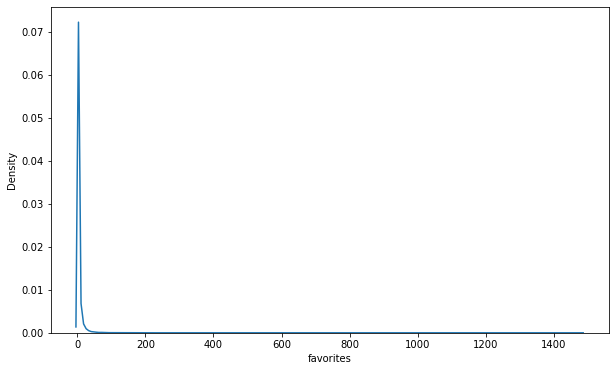

In [517]:
sns.kdeplot(df_track.favorites)

##### var: track.genre_top
empty: 53%

##### var: track.genres & genres_all
empty: 100%

analysis: 
genre top displays the single hierarchical top genre of the track from the genres present in genres. A long and thorough analysis was conducted on those variables.

We first noticed that around half of the tracks did not have a genre_top. We discovered that it was because of a conflict between two or more genres the artist indicated on hid song. Indeed every track that has an empty genre_top attribute has two or more genres or sub genres belonging to different top level genres and therefore was impossible to allocate to a single top level genre. We then noticed that around 2'000 rows had no genres at all in any of the genres columns; rendering them useless for any genres classification purpuses.

We then thought of ways to impute the empty genre_top values. Our first though was to impute top_genre's missing values with the most common genre of the album of a certain track. This approach failed as most album have identical genres for every track. We then analysed the various top level genres combination present in the genres_all with the intent to create new top level genres which would be the possible combination (eg. "Pop/Rock" and "Electronic/Funk"). This approach was also inapropriote as we found over 590 combinations of top level genres present in genres_all. Our final approach was to create a single new top level genre labeled as "Mixed", which would encompass all the tracks that have more than one top level genre in genre_all (and thus all the tracks where there is a conflict of genres or sub genres in genres).

data quality actions:
- drop the 2'000 rows with no genres (check if imputable from tags before)
- fillna of genre_top with "Mixed"

In [77]:
df_track.genre_top.isna().sum()/len(df)

0.5346144463002234

In [78]:
df_track.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [79]:
genres_top_list = list(set(genres_df.top_level.to_list()))

In [80]:
len(genres_top_list)

16

In [81]:
genres_top_list

[2, 3, 4, 5, 38, 8, 9, 10, 12, 13, 14, 15, 17, 1235, 20, 21]

In [82]:
df.track.loc[df.track.genre_top.isna(),'genres_all']

track_id
20          [17, 10, 76, 103]
26          [17, 10, 76, 103]
30          [17, 10, 76, 103]
46          [17, 10, 76, 103]
48          [17, 10, 76, 103]
                 ...         
155276           [32, 38, 15]
155277           [32, 38, 15]
155278    [42, 107, 1235, 15]
155288                     []
155320       [169, 10, 12, 9]
Name: genres_all, Length: 56976, dtype: object

In [83]:
genre_top_nan = pd.DataFrame(df.track.loc[df.track.genre_top.isna(),'genres_all'])

In [84]:
#la dimostrazione che ogni volta che genre_top è empty, ci sono due o più top_level genres in genres_all
for i, lista in genre_top_nan.iterrows():
    temp_list = []
    for item in lista[0]:
        if item in genres_top_list:
            temp_list.append(item)
    if len(temp_list) == 9:
        print(i)

In [85]:
genre_top_notna = pd.DataFrame(df.track.loc[df.track.genre_top.notna(),'genres_all'])

In [86]:
#la dimostrazione che ogni volta che genre_top non è empty, c'è un solo top_level genre in genres_all
for i, lista in genre_top_notna.iterrows():
    temp_list = []
    for item in lista[0]:
        if item in genres_top_list:
            temp_list.append(item)
    if len(temp_list) > 1:
        print(i)

In [87]:
#clean genretopnan
for i, lista in genre_top_nan.iterrows():
    temp_list = []
    for item in lista[0]:
        if item not in genres_top_list:
            temp_list.append(item)
    for j in temp_list:
        lista[0].remove(j)
        

In [88]:
genres_top_list

[2, 3, 4, 5, 38, 8, 9, 10, 12, 13, 14, 15, 17, 1235, 20, 21]

In [89]:
#abbiamo pensato di agglomerare i mix di top level genres in nuovi genres a se però abbiamo visto che ce ne sono quasi 600
genre_top_nan['genres_all'].astype('str').value_counts()

[38, 15]                       6410
[10, 12]                       3024
[]                             2231
[1235, 15]                     2129
[12, 38]                       1977
                               ... 
[4, 5, 9, 17]                     1
[4, 13, 1235]                     1
[10, 9, 12, 17]                   1
[2, 5, 38, 8, 13, 17, 1235]       1
[3, 15, 17, 20]                   1
Name: genres_all, Length: 596, dtype: int64

In [90]:
to_1D(genre_top_nan['genres_all']).value_counts()

NameError: name 'to_1D' is not defined

In [91]:
pd.DataFrame(df.track.genres_all)

,genres_all
track_id,
2,[21]
3,[21]
5,[21]
10,[10]
20,"[17, 10]"
...,...
155316,"[25, 12]"
155317,"[25, 12]"
155318,"[25, 12]"


In [92]:
df.track.genres_all.str.len() == 0

track_id
2         False
3         False
5         False
10        False
20        False
          ...  
155316    False
155317    False
155318    False
155319    False
155320    False
Name: genres_all, Length: 106574, dtype: bool

In [93]:
#abbiamo visto che ci sono rows che non hanno nessun genres 
df.drop(df.loc[df.track.genres_all.str.len() == 0].index, inplace = True)

In [94]:
#abbiamo pensato a come poter impute le rows senza genre_top. 
#Abbiamo prima pensato a prendere il genre più comune dell'album della track ma abbiamo visto que quasi sempre tutte le track di album hanno gli stessi genres.
pd.crosstab(df[('album', 'id')], df[('track','genre_top')])

"(track, genre_top)",Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
"(album, id)",,,,,,,,,,,,,,,,
-1,5,18,0,0,112,64,30,16,9,11,7,1,7,27,0,2
1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22928,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0
22935,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0
22936,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0


In [95]:
to_1df_track.genres

NameError: name 'to_1df_track' is not defined

In [542]:
to_1D(df_track.genres_all).value_counts()

38      37880
15      34030
12      32753
1235    14751
10      13762
        ...  
808        12
374         9
493         4
173         4
377         1
Length: 161, dtype: int64

In [75]:
genre_top_all = pd.DataFrame(df.track.genres_all)

In [76]:
#clean genre top  all: abbiamo creato una nuova colonna uguale a genres_all dalla quale abbiamo rimosso tutti gli id che non sono top level
genre_top_all = pd.DataFrame(df.track.genres_all)
for i, lista in genre_top_all.iterrows():
    temp_list = []
    for item in lista[0]:
        if item not in genres_top_list:
            temp_list.append(item)
    for j in temp_list:
        lista[0].remove(j)

NameError: name 'genres_top_list' is not defined

In [96]:
#nuova colonna: genres_all con solo i top level genres
genre_top_all

,genres_all
track_id,
2,[21]
3,[21]
5,[21]
10,[10]
20,"[17, 10]"
...,...
155316,"[25, 12]"
155317,"[25, 12]"
155318,"[25, 12]"


In [97]:
#ADD NEW COLUMN CREATED TO DF
df.track = df.track.join(genre_top_all.rename(columns={'genres_all' : 'genres_top_all'}),how = 'outer')

In [98]:
df.track.genre_top

track_id
2         Hip-Hop
3         Hip-Hop
5         Hip-Hop
10            Pop
20            NaN
           ...   
155316       Rock
155317       Rock
155318       Rock
155319       Rock
155320        NaN
Name: genre_top, Length: 104343, dtype: object

In [99]:
df.loc[:,('track','genre_top')].fillna('Mixed',inplace = True)

In [105]:
(df.loc[:,('track','genre_top')] == 'Mixed').sum()/(len(df))

0.5246638490363512

In [100]:
df.track.genre_top.isna().sum()

0

/Users/giovanni.scognamiglio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre_top', ylabel='count'>

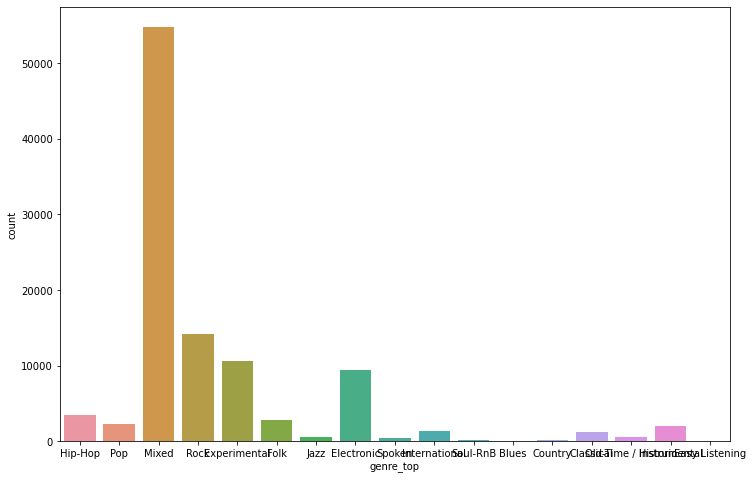

In [101]:
sns.countplot(df.track.genre_top)

In [750]:
df.track.genre_top

track_id
2         Hip-Hop
3         Hip-Hop
5         Hip-Hop
10            Pop
20            NaN
           ...   
155316       Rock
155317       Rock
155318       Rock
155319       Rock
155320        NaN
Name: genre_top, Length: 105718, dtype: object

In [545]:
df_track.information.isna().sum()/len(df)

0.9777994286687225

In [754]:
df.loc[:,('track','genre_top')].fillna('Mixed',inplace = True)

In [546]:
df_track.interest.isna().sum()/len(df)

0.0

In [755]:
df.track.genre_top.isna().sum()

0

In [553]:
df.loc[df_track.interest < 3]

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
150617          0 2017-02-03 18:32:33           NaT      NaN         0  22469   

                                                                             \
         information listens producer tags                            title   
track_id                                                                      
150617           NaN     795      NaN   []  CONSUMPTION PRODUCT VERSION 2.0   

                                artist                                         \
         tracks type active_year_begin active_year_end associated_labels  bio   
track_id                                                                        
150617       45  NaN               NaT             NaT               NaN  NaN   

                                                                          \
         comments        date_created favorites     id latitude location   
track_id                                                                   
150617          0 2016-05-18 13:01:49         1  22159      NaN      NaN   

                                                                           \
         longitude members      name related_projects        tags website   
track_id                                                                    
150617         NaN     NaN  ODORBABY              NaN  [odorbaby]     NaN   

                              set           track                    \
         wikipedia_page     split subset bit_rate comments composer   
track_id                                                              
150617              NaN  training  large   256000        0      NaN   

                                                                             \
                date_created date_recorded duration favorites     genre_top   
track_id                                                                      
150617   2017-02-03 18:40:36           NaT       60         0  Experimental   

                                                               \
         genres genres_all information interest language_code   
track_id                                                        
150617     [32]   [32, 38]         NaN        2           NaN   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
150617    Creative Commons Attribution-NonCommercial-NoD...       1      NaN   

                                      
         number publisher tags title  
track_id                              
150617       11       NaN   []    11

[Text(0.5, 1.0, 'Top genres')]

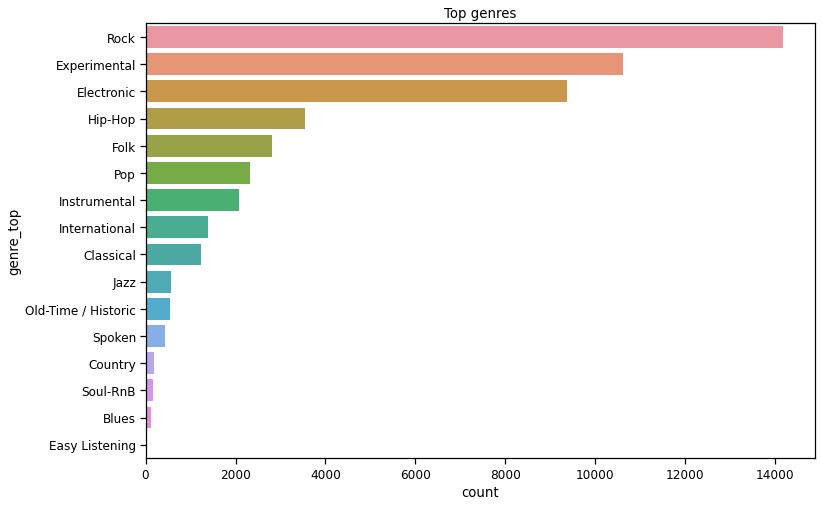

In [57]:
#using seaborn
sns.countplot(y = df_track.genre_top, order = df_track.genre_top.value_counts().index).set(title = 'Top genres')

[Text(0.5, 1.0, 'Top genres')]

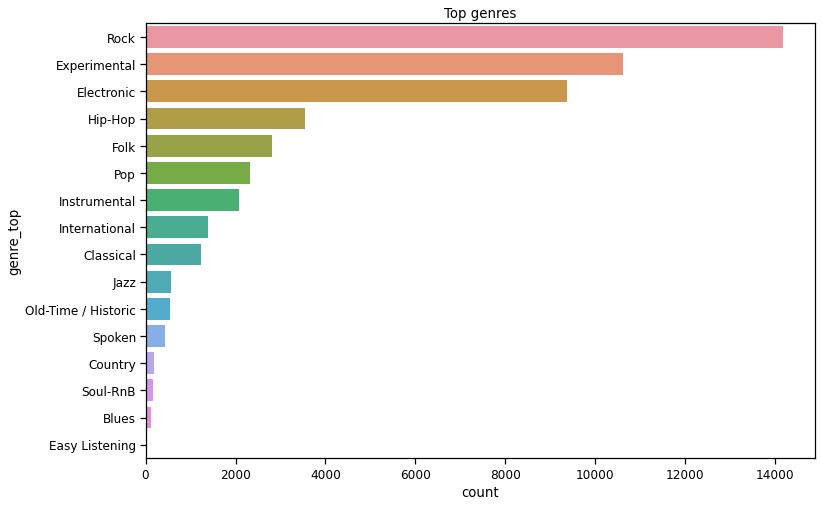

In [55]:
sns.countplot(y = df.track.genre_top, order = df.track.genre_top.value_counts().index).set(title = 'Top genres')

Text(0.5, 1.0, 'Tracks genres distribution')

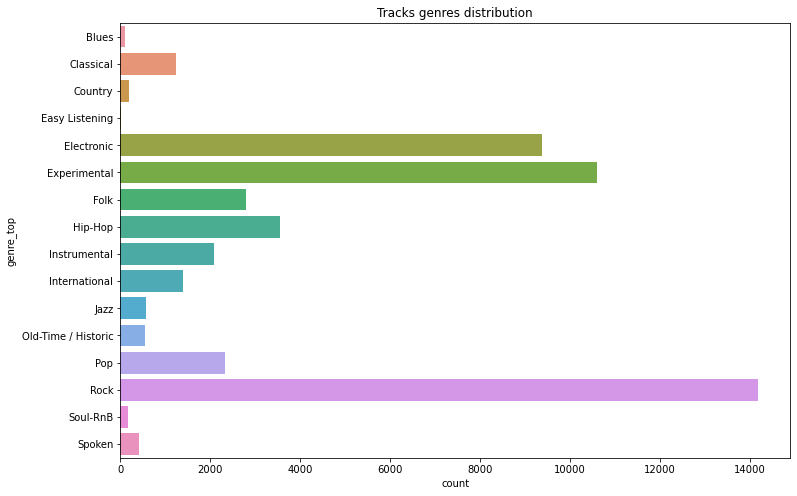

In [65]:
fig, ax = plt.subplots()
sns.countplot(y=df.track.genre_top)
ax.set_title('Tracks genres distribution')

In [557]:
df_track.language_code.isna

0.8580563385610775

In [562]:
df_track.license.value_counts()[:20]

Attribution-Noncommercial-Share Alike 3.0 United States                          18878
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International    17674
Attribution-NonCommercial-ShareAlike 3.0 International                           15179
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                     12044
Attribution-Noncommercial-No Derivative Works 3.0 United States                  10561
Attribution-NonCommercial-ShareAlike                                              6850
Attribution                                                                       4921
Attribution-NonCommercial 3.0 International                                       3552
Attribution-NonCommercial                                                         3372
Attribution-ShareAlike                                                            1533
Attribution-Noncommercial 3.0 United States                                       1036
Creative Commons Attribution               

In [564]:
df_track.listens.describe()

count    105718.000000
mean       2331.815878
std        8046.655465
min           0.000000
25%         291.000000
50%         761.000000
75%        2015.000000
max      543252.000000
Name: listens, dtype: float64

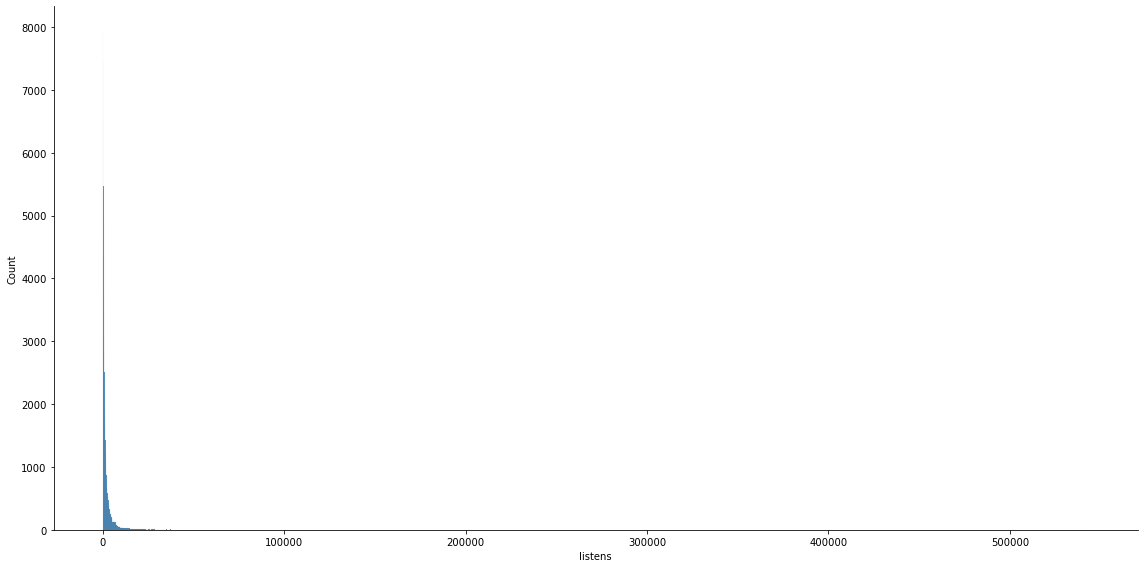

In [566]:
sns.displot(df_track.listens, height = 8, aspect = 2)

In [570]:
df_track.loc[df_track.listens ==543252]

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
42377,320.0,37,NaN,2011-01-18 12:05:20,NaT,194,1482,Electronic,"[15, 184]","[184, 15]",NaN,3293557,NaN,Creative Commons Attribution,543252,NaN,1,NaN,"[trip hop, tracks to sync, stellar]",Night Owl


In [ ]:
var: track.lyricist
empty: 99.7%

analysis: drop

In [571]:
df_track.lyricist.isna().sum()/len(df)

0.9970582114682457

In [572]:
df_track.number.isna().sum()/len(df)

0.0

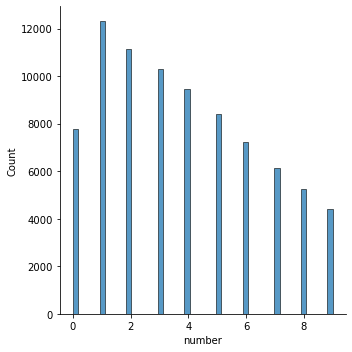

In [574]:
sns.displot(df_track.number.loc[df_track.number<10])

In [584]:
df_track.publisher.isna().sum()/len(df)

0.9881477137289771

In [587]:
df_track.tags.astype('str').value_counts()

[]                                                                                                                                                                                                       82380
['interiors c1964', 'existential', 'hardcore-punk', 'pop-punk', 'punk-rock', 'internet boyfriend', 'rew starr', 'public domain', 'creative commons', 'microsong challenge']                                310
['classwar karaoke']                                                                                                                                                                                       238
['all styles experimental']                                                                                                                                                                                215
['improvisation', 'not normal music', 'all styles experimental']                                                                                                            

In [588]:
82380/len(df)

0.7792428914659755

In [770]:
#END

In [ ]:
df_album.loc[df_album.comments == -1,:].describe()

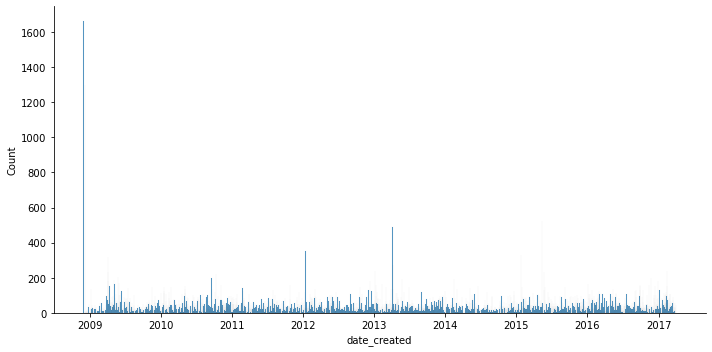

In [222]:
sns.displot(data = df.album, x = 'date_created', height = 5, aspect = 2, discrete = True)

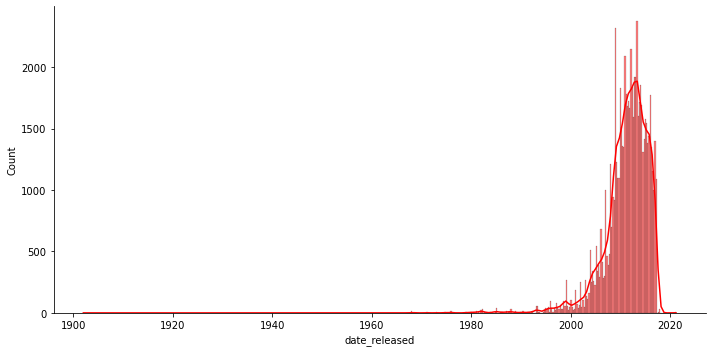

In [191]:
sns.displot(df.album.date_released, height = 5, aspect = 2, kde=  True, color = 'red')

In [215]:
df.loc[df.album.date_released < pd.Timestamp(2008,11,26),:]

album                                                              \
         comments        date_created date_released engineer favorites     id   
track_id                                                                        
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4      6   
137             1 2008-11-26 01:49:35    2006-12-01      NaN         2     59   
138             1 2008-11-26 01:49:35    2006-12-01      NaN         2     59   
140             1 2008-11-26 01:49:59    2007-05-22      NaN         1     61   
142             0 2008-11-26 01:50:03    2005-01-25      NaN         1     62   
...           ...                 ...           ...      ...       ...    ...   
153365          0 2017-02-23 08:55:32    2005-02-01      NaN         0  22716   
153420          0 2017-02-23 08:55:32    2005-02-01      NaN         0  22716   
153423          0 2017-02-23 08:55:32    2005-02-01      NaN         0  22716   
153449          0 2017-02-23 08:55:32    2005-02-01      NaN         0  22716   
153450          0 2017-02-23 08:55:32    2005-02-01      NaN         0  22716   

                                                                     \
                                                information listens   
track_id                                                              
10                                                      NaN   47632   
137       <p>Here's the proof in the pudding that the as...    1681   
138       <p>Here's the proof in the pudding that the as...    1681   
140       <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...    1300   
142       <p>Recorded at Sound Station Seven and at home...     845   
...                                                     ...     ...   
153365                              <p>Released on tape</p>    2084   
153420                              <p>Released on tape</p>    2084   
153423                              <p>Released on tape</p>    2084   
153449                              <p>Released on tape</p>    2084   
153450                              <p>Released on tape</p>    2084   

                                                                             \
                                producer     tags              title tracks   
track_id                                                                      
10                                   NaN       []  Constant Hitmaker      2   
137                                  NaN  [lafms]       Live at LACE      2   
138                                  NaN  [lafms]       Live at LACE      2   
140       Alec K. Refearn, Rob Pemberton       []     The Blind Spot      1   
142                                  NaN       []     The Quiet Room      1   
...                                  ...      ...                ...    ...   
153365                               NaN       []        A+B = Amour     14   
153420                               NaN       []        A+B = Amour     14   
153423                               NaN       []        A+B = Amour     14   
153449                               NaN       []        A+B = Amour     14   
153450                               NaN       []        A+B = Amour     14   

                                      artist                  \
                      type active_year_begin active_year_end   
track_id                                                       
10                   Album               NaT             NaT   
137       Live Performance        1978-01-01      1998-01-01   
138       Live Performance        1978-01-01      1998-01-01   
140                  Album        1999-01-01             NaT   
142                  Album        1999-01-01             NaT   
...                    ...               ...             ...   
153365               Album        2002-01-01      2006-01-01   
153420               Album        2002-01-01      2006-01-01   
153423               Album        2002-01-01      2006-01-01   
153449 

In [57]:
#show summary stats of non numeric variables (object & category dtypes)
non_num = df.describe(include=['object','category'])
non_num

album                                                     \
              engineer                                        information   
count            15295                                              83149   
unique             622                                              11075   
top     Ernie Indradat  <p class="p1" style="margin: 0px; padding: 8px...   
freq               876                                                310   

                                                                 artist  \
          producer    tags              title    type associated_labels   
count        18060  106574             105549  100066             14271   
unique         760    2388              14298       5               754   
top     Joe Belock      []  microSong Entries   Album      HUSH Records   
freq           855   83549                310   87549               604   

                                                                         \
                                                      bio      location   
count                                               71156         70210   
unique                                               6084          2329   
top     <p><span style="color: #333333; font-family: G...  Brooklyn, NY   
freq                                                  745          2327   

                                    \
                  members     name   
count               46849   106574   
unique               4015    16294   
top     Konstantin Trokay  Kosta T   
freq                  745      745   

                                                                   \
                                         related_projects    tags   
count                                               13152  106574   
unique                                                752   15660   
top     Ratatat, Lullatone, Nightmares On Wax, Air, Mo...      []   
freq                                                  604    3061   

                                                  \
                                         website   
count                                      79256   
unique                                      6642   
top     https://soundcloud.com/konstantin-trokay   
freq                                         745   

                                                         set          \
                                    wikipedia_page     split  subset   
count                                         5581    106574  106574   
unique                                         389         3       3   
top     http://en.wikipedia.org/wiki/Josh_Woodward  training   large   
freq                                           284     84353   81574   

                    track                               \
                 composer genre_top  genres genres_all   
count                3670     49598  106574     106574   
unique                505        16    4768       4151   
top     konstantin trokai      Rock    [21]       [21]   
freq                  541     14182    2735       2735   

                                                                         \
                                              information language_code   
count                                                2349         15024   
unique                                               1586            44   
top     <p><a href="http://www.myspace.com/theshambler...            en   
freq                                                   22         14255   

                                                                          \
                                                  license       lyricist   
count                                              106487            311   
unique                                                113             66   
top     Attribution-Noncommercial-Share Alike 3.0 Unit...  Apache Tomcat   
freq                                                19250             44   

     

In [58]:
#define qualitative vars
qual_vars = list(non_num)
qual_vars.extend([('album', 'id'),('artist', 'id')])
qual_vars

[('album', 'engineer'),
 ('album', 'information'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'type'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'location'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),
 ('artist', 'wikipedia_page'),
 ('set', 'split'),
 ('set', 'subset'),
 ('track', 'composer'),
 ('track', 'genre_top'),
 ('track', 'genres'),
 ('track', 'genres_all'),
 ('track', 'information'),
 ('track', 'language_code'),
 ('track', 'license'),
 ('track', 'lyricist'),
 ('track', 'publisher'),
 ('track', 'tags'),
 ('track', 'title'),
 ('album', 'id'),
 ('artist', 'id')]

In [65]:
print(df.loc[:,('track', 'genres')].astype('str').unique())

['[21]' '[10]' '[76, 103]' ... '[17, 63, 1235]' '[42, 107, 183]'
 '[10, 12, 169]']


In [90]:
#Explore qualitative attributes
for column in list(df.loc[:,qual_vars]):
    if df[column].dtype.name == 'category':
        print(f'var {column} :' , f'\t{(df[column].isna().sum()/len(df[column]))*100:.0f}% empty', f'\t{len(df[column].unique())} unique values')
        print('\nfirst 100 uniques: ' , str(df[column].unique()[:100]))
        print('\n' , df[column].value_counts())
    else:
        print(f'var {column} :' , f'\t{(df[column].isna().sum()/len(df[column]))*100:.0f}% empty', f"\t{len(df[column].astype('str').unique())} unique values")
        print('\nfirst 100 uniques : ' , str(df[column].astype('str').unique()[:100]))
        print('\nvalue counts :\n' , df[column].astype('str').value_counts())
    print("_________________________________________________________________\n")

var ('album', 'engineer') : 	86% empty 	623 unique values

first 100 uniques :  ['nan' 'Ariel Pink' 'Dave Public'
 'Brian Mumform (teen sports! no rules! studio)' 'self-recorded'
 'Jason Engel' 'Scott Williams' 'Michael Goodstein' 'Trent Wolbe'
 'Diane Farris and Stu Ritherford' 'Irene Trudel' 'Gil Shuster'
 'Bil Bowen' 'Brandon Perry' 'Glenn Luttman' 'Chris Stubbs'
 'Jason Sigal with Adrian Caballero' 'Gil Schuster' 'Richard Rusincovitch'
 'Diane Farris' 'Joe Belock' 'Charles Maggio' 'Rob Hatch-Miller'
 'Jesse Cannon and Dianne Kamikaze' 'Evan Muse' 'Stu Rutherford' 'Diane'
 'Cosmic Cowboy' 'Richard Rusincovich' 'Mark Triant' 'Jesse Chan'
 'Jason Sigal & Dylan Going' 'Jesse Cannon' 'James Theesfield'
 'Scott McDowell' 'Bill Bowen' 'James Theesfeld' 'Veronica Liu'
 'Diane Farris & Stu Rutherford' 'Steven R Smith' 'Dave Amels'
 'Trent Wolbe and Diane Farris' 'Doron' 'Diane Farris and Irene Trudel'
 'Dave Amales, Stu Rutherford, & Mike Sin' 'Jason Sigal' 'Matt LeMay'
 'Raven Stüdyosu' 'K

In [ ]:
sns.viozlinplot

In [ ]:
len(qual_vars)

In [ ]:
len(list(df.describe(include=['object','category'])))

In [ ]:
sns.countplot(x = df.album.date_created)

In [ ]:
sns.displot(df.album.date_created, kind='hist')

In [ ]:
#check for relationship among missing data (does one missing data triggers another)
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

In [ ]:
len(list(df))-1

[Text(0.5, 1.0, 'Top genres')]

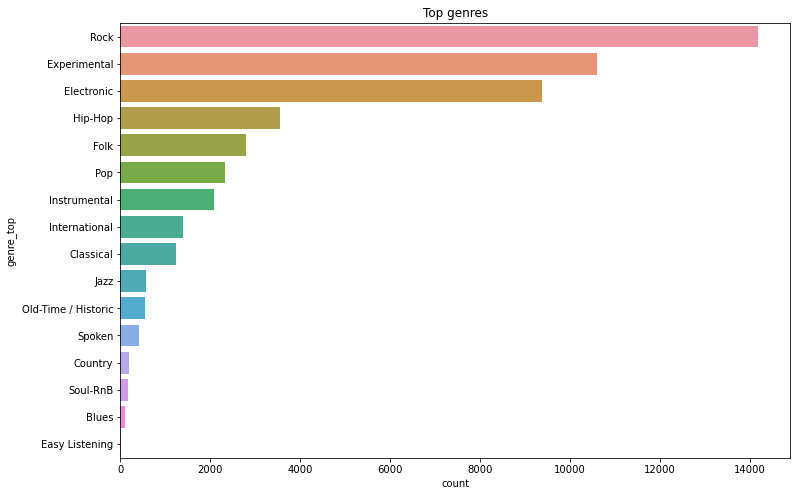

In [63]:
#using seaborn
sns.countplot(y = df.track.genre_top, order = df.track.genre_top.value_counts().index).set(title = 'Top genres')

[Text(0.5, 1.0, 'Top genres')]

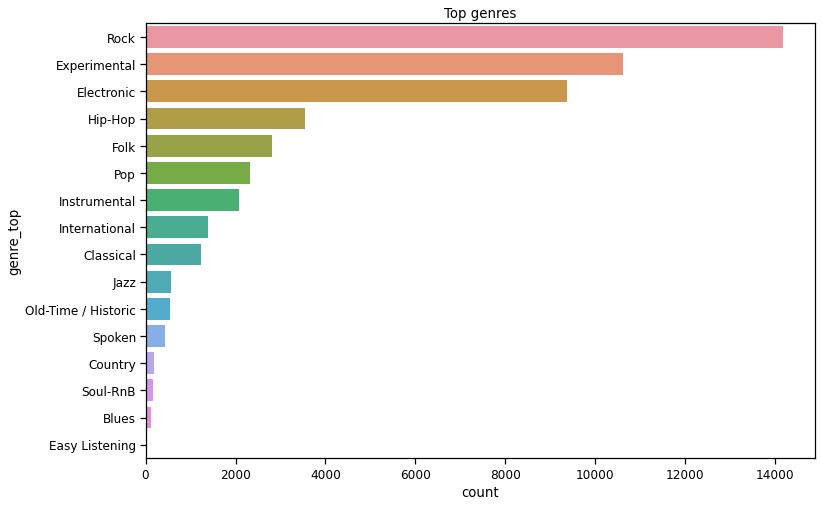

In [54]:
#using seaborn
sns.countplot(y = df.track.genre_top, order = df.track.genre_top.value_counts().index).set(title = 'Top genres')

<AxesSubplot:title={'center':'Top genres distritbution'}>

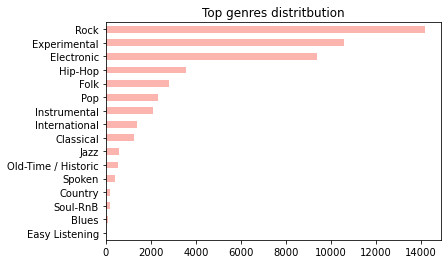

In [277]:
#using pandas plot
df.track.genre_top.value_counts(ascending=True).plot(kind='barh', title = 'Top genres distritbution', colormap = 'Pastel1')

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
to_1D(df.album.tags)

In [ ]:
len(pd.notna(df.album.tags))

In [113]:
plt.style.use('default')

In [598]:
plt.rc('figure', figsize=(18, 9))

In [ ]:
#plt.style.use('seaborn')
print(plt.style.available)
#default -> plt.style.use('default')

In [812]:
echonest_df

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                                                          \
                                           metadata                        
         speechiness    tempo   valence  album_date           album_name   
track_id                                                                   
2           0.159310  165.922  0.576661         NaN                  NaN   
3           0.461818  126.957  0.269240         NaN                  NaN   
5           0.124595  100.260  0.621661         NaN                  NaN   
10          0.032985  111.562  0.963590  2008-03-11    Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                  NaN   
...              ...      ...       ...         ...                  ...   
124857      0.082550  141.332  0.890461         NaN                  NaN   
124862      0.074001  101.975  0.476845         NaN                  NaN   
124863      0.051517  129.996  0.496667         NaN                  NaN   
124864      0.033388  142.009  0.569274         NaN                  NaN   
124911      0.065189  119.965  0.204652  2009-10-23  Suicide Beauty Girl   

                                                                   \
                                                                    
         artist_latitude                          artist_location   
track_id                                                            
2                32.6783                              Georgia, US   
3                32.6783                              Georgia, US   
5                32.6783                              Georgia, US   
10               39.9523                     Philadelphia, PA, US   
134              32.6783                              Georgia, US   
...                  ...                                      ...   
124857           52.1082                              Netherlands   
124862           52.1082                              Netherlands   
124863           52.1082                              Netherlands   
124864           52.1082                              Netherlands   
124911           35.7497  Higashiyamato-shi, Tokyo Prefecture, JP   

                                                                  \
                                                                   
         artist_longitude      artist_name               release   
track_id                                                           
2               -83.22300             AWOL  AWOL - A Way Of Life   
3               -83.22300             AWOL  AWOL - A Way Of Life   
5               -83.22300             AWOL  AWOL - A Way Of Life   
10              -75.16240        Kurt Vile     Constant Hitmaker   
134             -83.22300             AWOL  AWOL - A Way Of Life   
...                   ...              ...                   ...   
12

In [839]:
df.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [844]:
df.columns.droplevel(1)

Index(['album', 'album', 'album', 'album', 'album', 'album', 'album', 'album',
       'album', 'album', 'album', 'album', 'album', 'artist', 'artist',
       'artist', 'artist', 'artist', 'artist', 'artist', 'artist', 'artist',
       'artist', 'artist', 'artist', 'artist', 'artist', 'artist', 'artist',
       'artist', 'set', 'set', 'track', 'track', 'track', 'track', 'track',
       'track', 'track', 'track', 'track', 'track', 'track', 'track', 'track',
       'track', 'track', 'track', 'track', 'track', 'track', 'track'],
      dtype='object')

In [850]:
df.columns = df.columns.to_flat_index()

In [852]:
df

,"(album, comments)","(album, date_created)","(album, date_released)","(album, engineer)","(album, favorites)","(album, id)","(album, information)","(album, listens)","(album, producer)","(album, tags)","(album, title)","(album, tracks)","(album, type)","(artist, active_year_begin)","(artist, active_year_end)","(artist, associated_labels)","(artist, bio)","(artist, comments)","(artist, date_created)","(artist, favorites)","(artist, id)","(artist, latitude)","(artist, location)","(artist, longitude)","(artist, members)","(artist, name)","(artist, related_projects)","(artist, tags)","(artist, website)","(artist, wikipedia_page)","(set, split)","(set, subset)","(track, bit_rate)","(track, comments)","(track, composer)","(track, date_created)","(track, date_recorded)","(track, duration)","(track, favorites)","(track, genre_top)","(track, genres)","(track, genres_all)","(track, information)","(track, interest)","(track, language_code)","(track, license)","(track, listens)","(track, lyricist)","(track, number)","(track, publisher)","(track, tags)","(track, title)"
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [864]:
echo_to_merge = echonest_df.iloc[:,:8].copy()

In [867]:
echo_to_merge.columns = echonest_df.iloc[:,:8].columns.droplevel(0).to_flat_index()

In [870]:
dfx = pd.merge(echo_to_merge, df, on ='track_id')

In [872]:
list(dfx)

[('audio_features', 'acousticness'),
 ('audio_features', 'danceability'),
 ('audio_features', 'energy'),
 ('audio_features', 'instrumentalness'),
 ('audio_features', 'liveness'),
 ('audio_features', 'speechiness'),
 ('audio_features', 'tempo'),
 ('audio_features', 'valence'),
 ('album', 'comments'),
 ('album', 'date_created'),
 ('album', 'date_released'),
 ('album', 'engineer'),
 ('album', 'favorites'),
 ('album', 'id'),
 ('album', 'information'),
 ('album', 'listens'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'tracks'),
 ('album', 'type'),
 ('artist', 'active_year_begin'),
 ('artist', 'active_year_end'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'comments'),
 ('artist', 'date_created'),
 ('artist', 'favorites'),
 ('artist', 'id'),
 ('artist', 'latitude'),
 ('artist', 'location'),
 ('artist', 'longitude'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),


In [876]:
dfx.groupby([('album', 'type')]).sum()

,"(audio_features, acousticness)","(audio_features, danceability)","(audio_features, energy)","(audio_features, instrumentalness)","(audio_features, liveness)","(audio_features, speechiness)","(audio_features, tempo)","(audio_features, valence)","(album, comments)","(album, favorites)","(album, id)","(album, listens)","(album, tracks)","(artist, comments)","(artist, favorites)","(artist, id)","(artist, latitude)","(artist, longitude)","(track, bit_rate)","(track, comments)","(track, duration)","(track, favorites)","(track, interest)","(track, listens)","(track, number)"
"(album, type)",,,,,,,,,,,,,,,,,,,,,,,,,
Album,4663.303306,4916.503538,5155.526211,6235.697391,1692.435639,982.218483,1166742.138,4213.673015,3944,18521,64630635,245717953,130364,17735,216537,64891890,217171.959275,-213018.327738,2404727189,508,2242885,48689,42907219,24027769,55879
Contest,9.277330,7.287643,4.577310,7.399299,2.284911,1.328610,1561.832,4.082413,238,42,105756,325752,1120,16,104,106385,378.299457,-265.982437,3742070,4,1973,23,34374,23353,105
Live Performance,763.775997,449.562086,613.512721,753.576342,325.425052,94.498253,148626.997,494.660853,332,1789,6014296,17882293,11546,906,16556,5375729,34546.711929,-58371.740630,280430783,15,414845,3110,2786633,1707543,5993
Radio Program,1189.495565,819.253775,1052.615264,1135.707694,353.849544,178.809149,245892.661,880.182530,227,1566,10593654,13021263,18647,936,15277,9727481,59802.277199,-107246.431560,472921387,52,504513,3179,2754959,1677987,9655
Single Tracks,87.207139,56.795577,81.374920,99.299291,28.493294,15.133294,18009.860,51.581464,14,129,373474,1458760,819,88,1429,332767,4681.828305,-9942.243840,30311022,2,33604,730,439738,266813,416
